##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
#!pip install statsmodels
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

##Generate the data

In [ ]:
np.random.seed(0)
x=np.array([i*np.pi/180 for i in range(60,300,4)])
y=np.cos(1.2*x)+np.random.normal(0,0.2,len(x))

Visualize the data

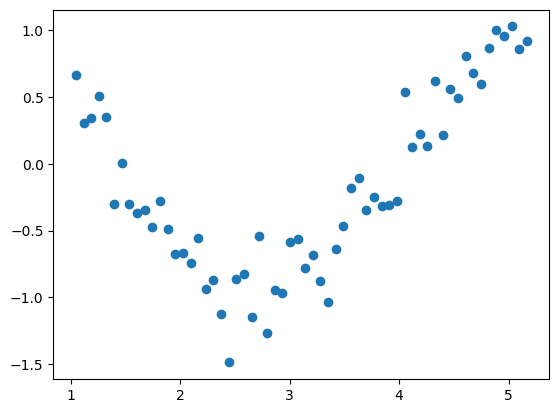

In [ ]:
plt.scatter(x,y)

##Plotting function

In [ ]:
def ALL_Plot(x,y,y_hat,d,r,text,alpha=None):
  """
  This function plot all the required plots Best fit, Residual and Q-Q plot
  """
  plt.figure(figsize=(20, 6))
  if text=='Ridge' or text=='Lasso':
    plt.suptitle(f"Ouput of {text} regression with x degree {d} and R2 {r:.2f} with $\\alpha$ {alpha}",fontsize=15)
  else :
    plt.suptitle(f"Ouput of {text} regression with x degree {d} and R2 {r:.2f}",fontsize=15)
  plt.subplot(1,3,1)
  plt.scatter(x,y,label='Scattered Data')
  plt.plot(x,y_hat,label='Fit line',color='r')
  plt.title("Best fit curve")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.subplot(1,3,2)
  plt.scatter(y_hat,y-y_hat)
  plt.axhline(y=0,linestyle='--',color='black')
  plt.title("Residual Plot")
  plt.xlabel(r'$\hat{y}$')
  plt.ylabel('Residuals')
  ax=plt.subplot(1,3,3)
  sm.qqplot(y-y_hat,line='45',fit=True,dist=stats.norm,ax=ax)
  plt.axhline(y=0,linestyle='--',color='black')
  plt.axvline(x=0,linestyle='--',color='black')
  plt.title("Q-Q plot")
  plt.xlabel('Theoretical Quantiles')
  plt.ylabel('Data Quantiles')
  plt.show()

**Add extra higher powers of x**

In [ ]:
def Add_extra(x,pow):
  """
  This function increases the power of x. pow takes input integer >1.
  returns a matrix containing the higher powers of x.
  """
  new_feat=[x**i for i in range(1,pow+1)]
  return np.array(new_feat).T

In [ ]:
def Model_fit(Name,model,l,p,alpha=None):
  """
  Function for fitting the model.
  """
  for i in range(l,p):
    D=Add_extra(x,i)
    s=StandardScaler()
    D=s.fit_transform(D)
    model.fit(D,y)
    y_hat=model.predict(D)
    r=r2_score(y,y_hat)
    ALL_Plot(D[:,0],y,y_hat,i,r,Name,alpha)

##Part 1

##Ordinary Linear Regression

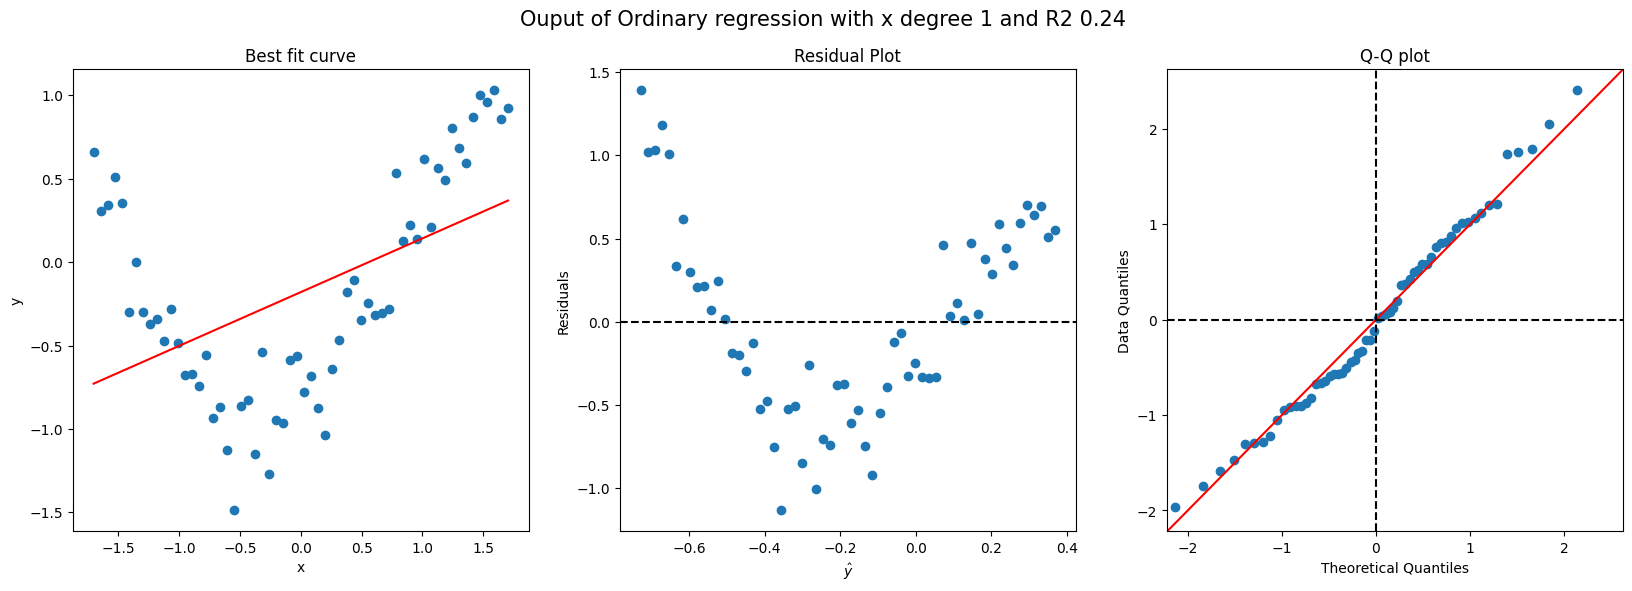

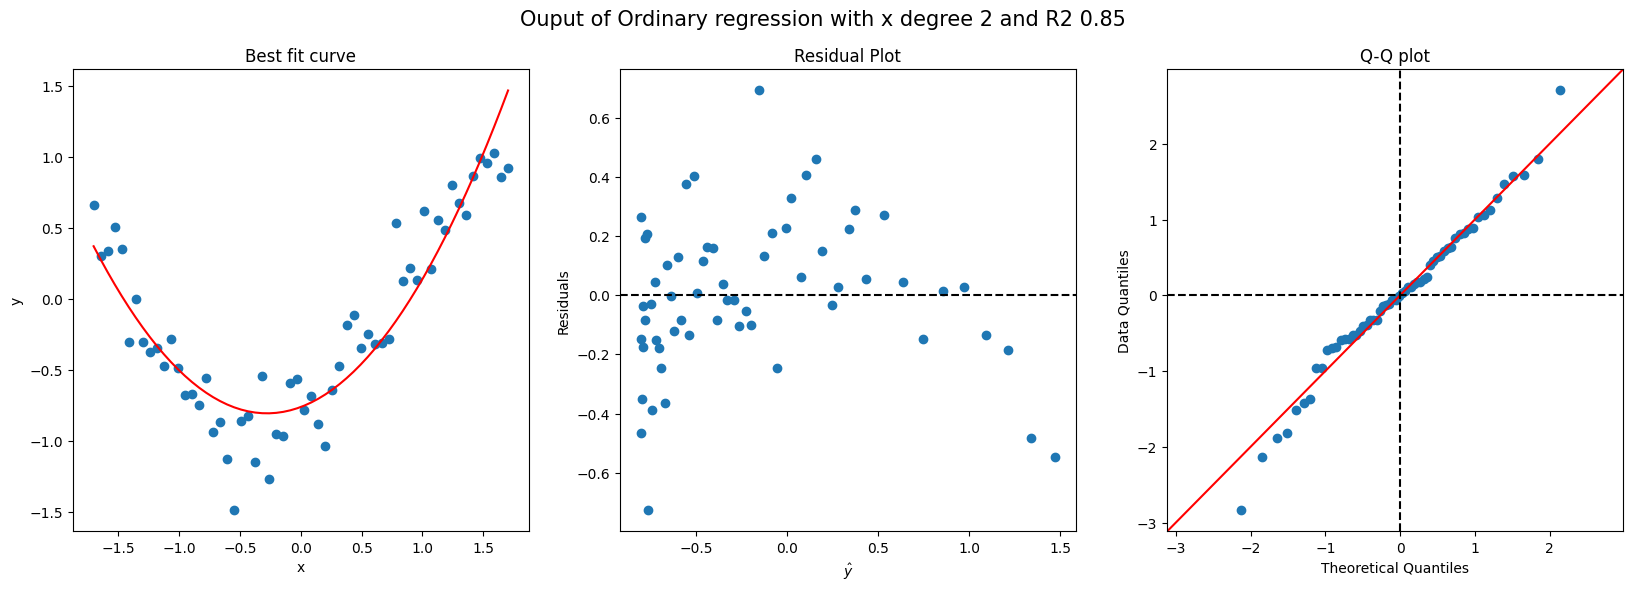

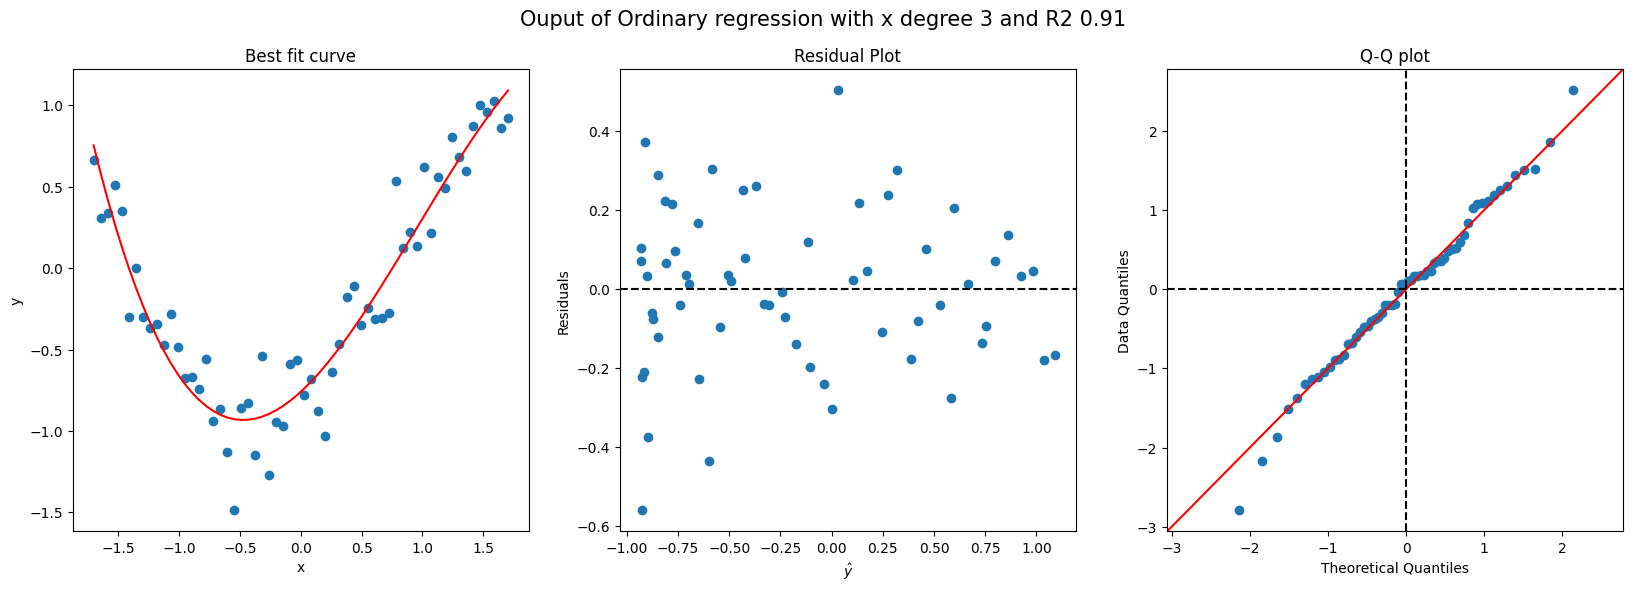

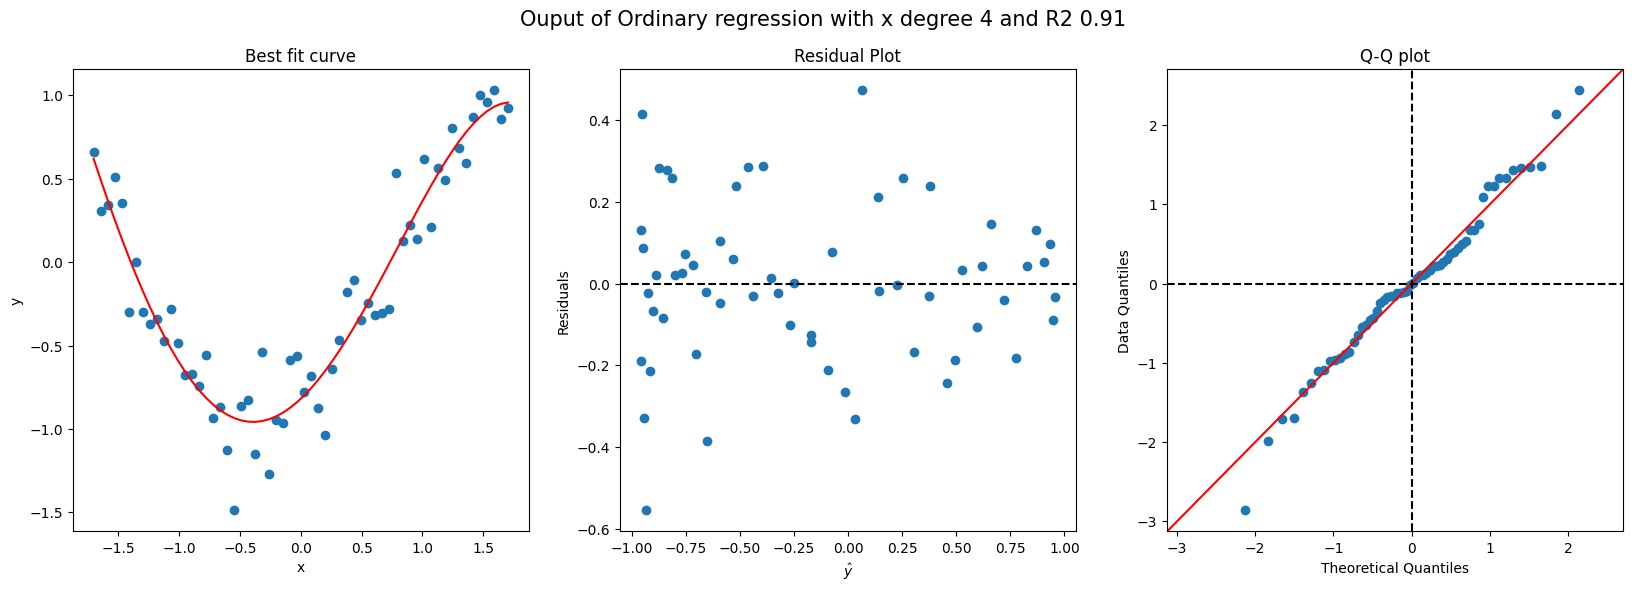

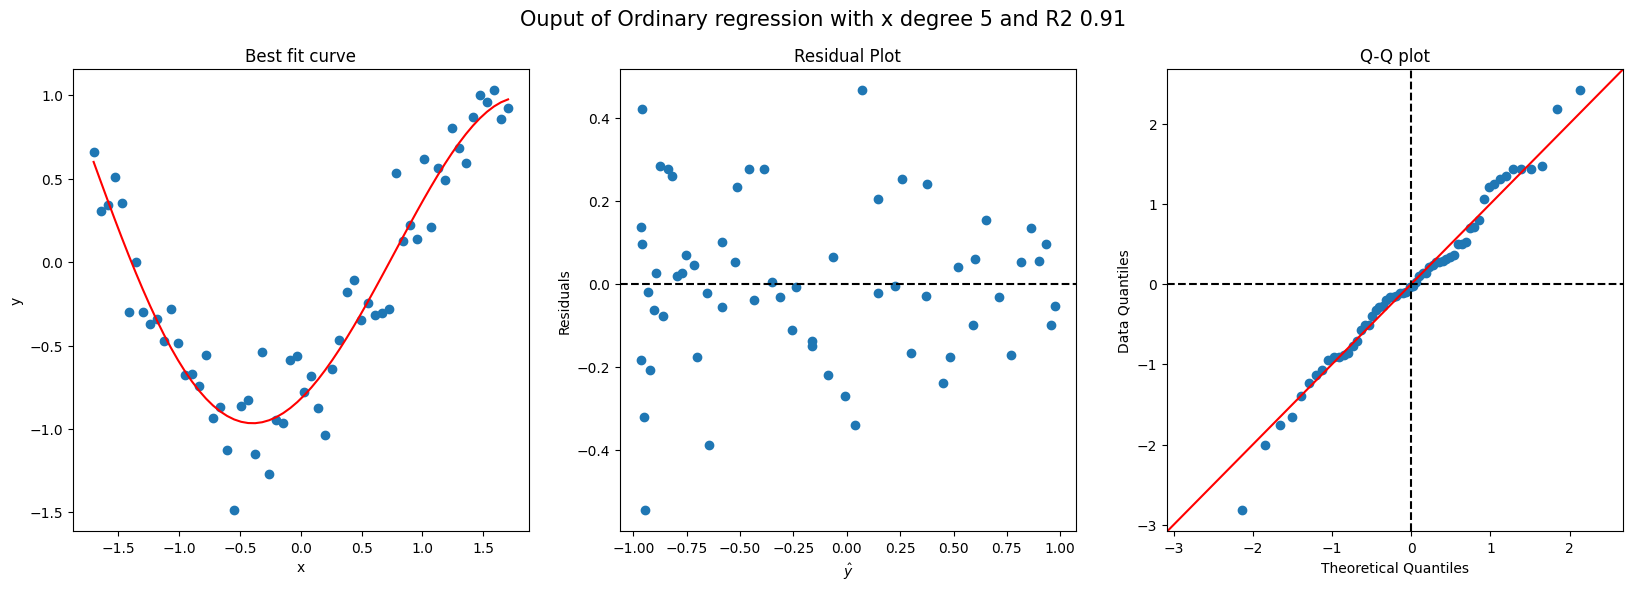

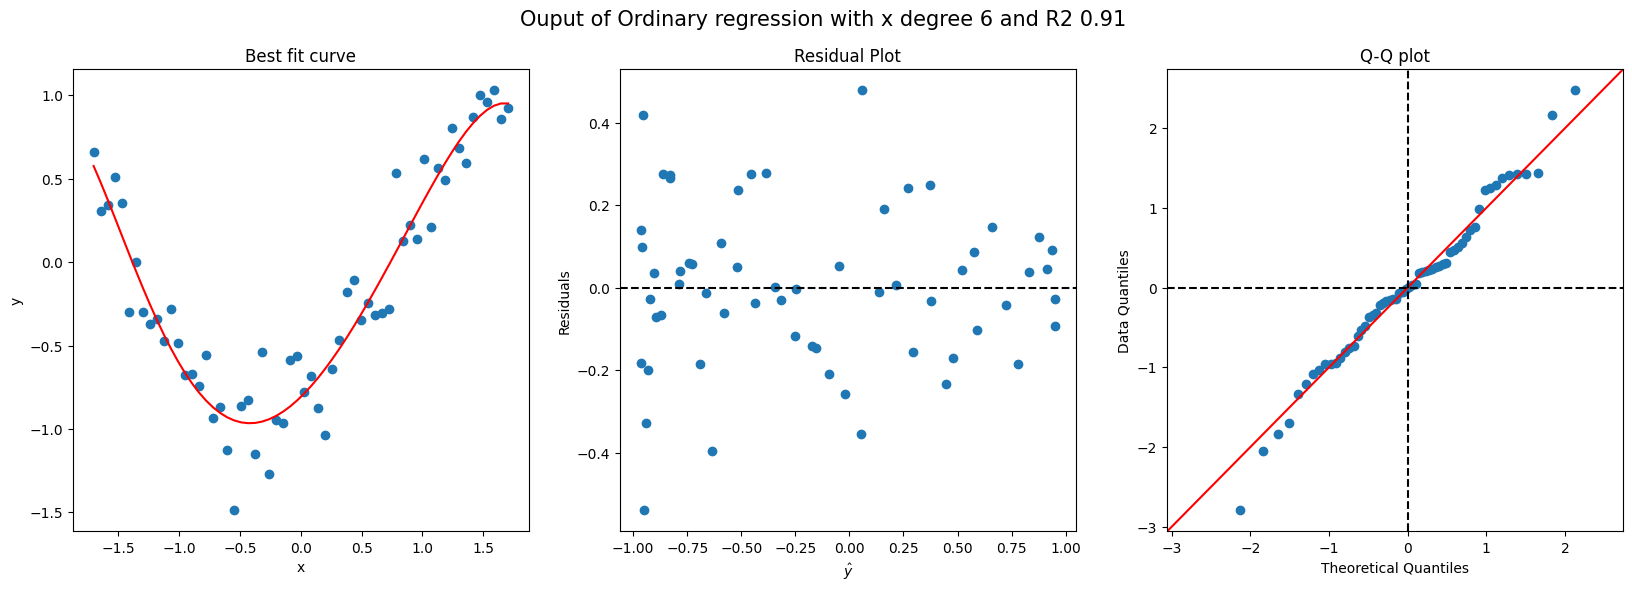

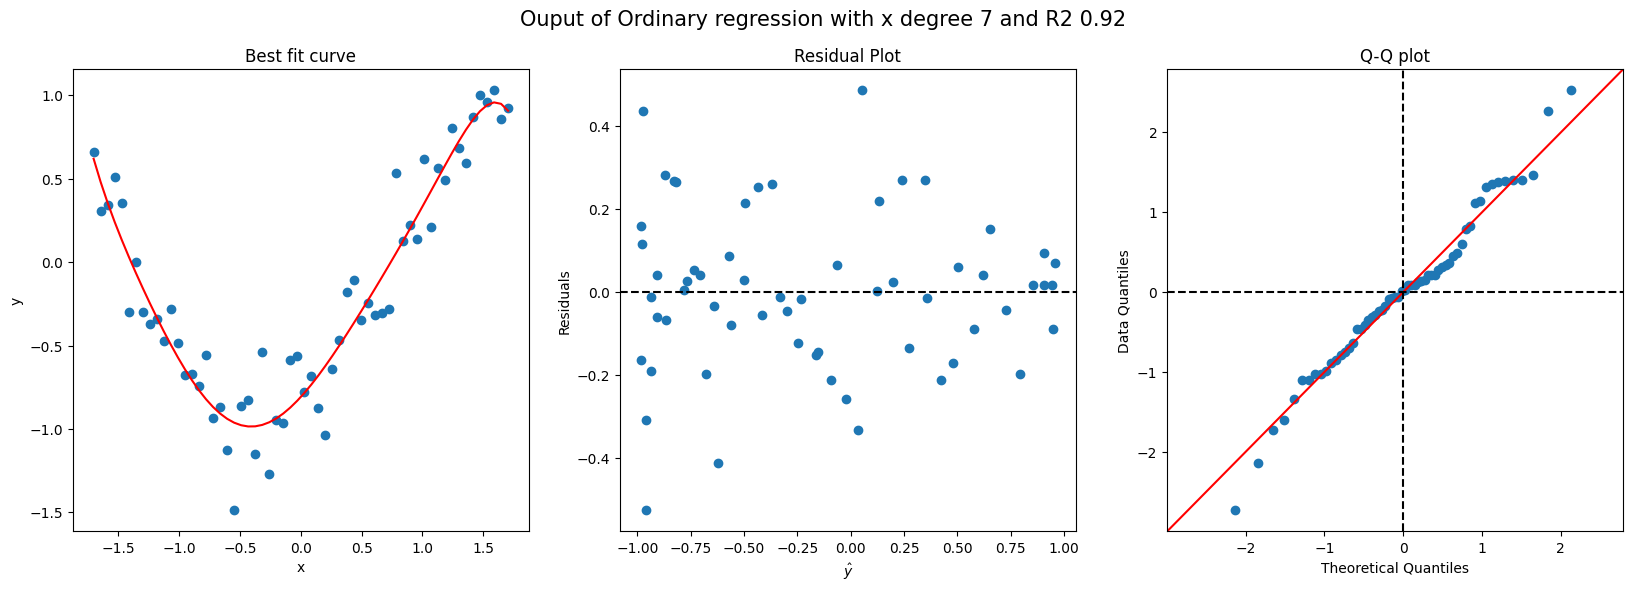

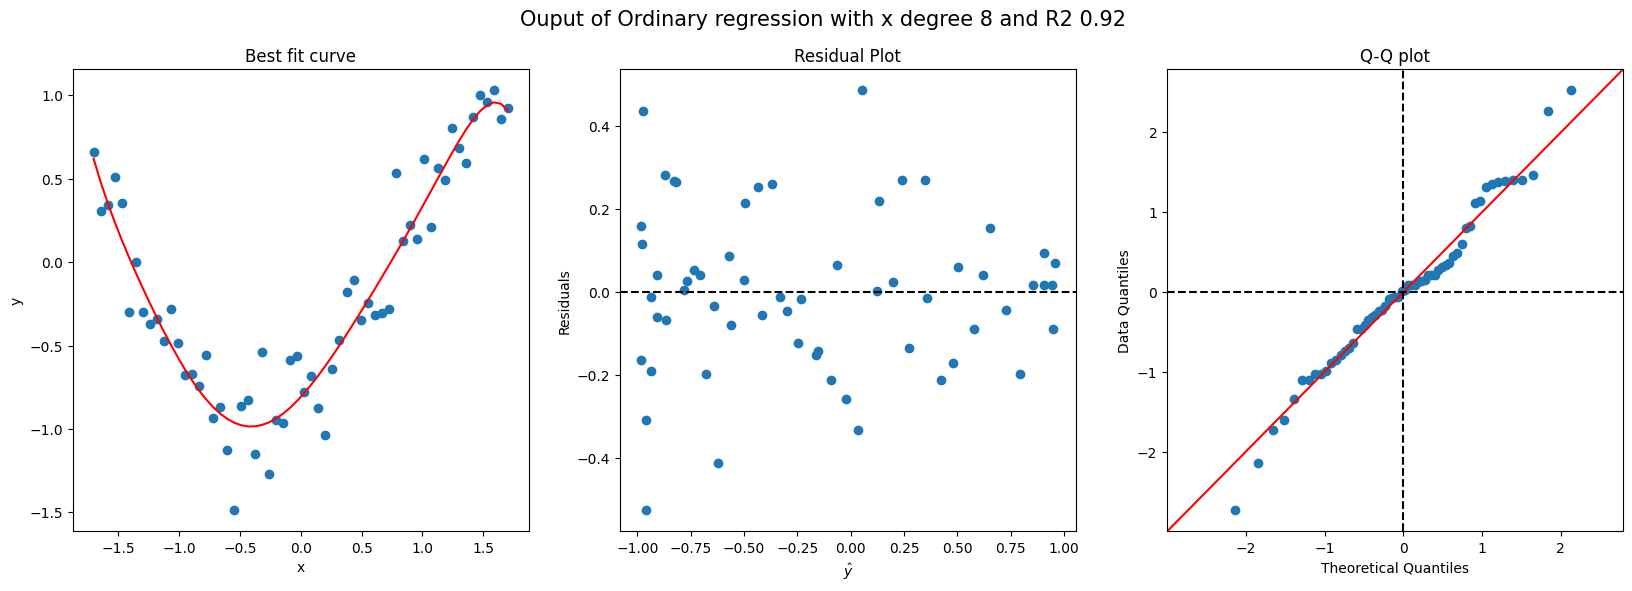

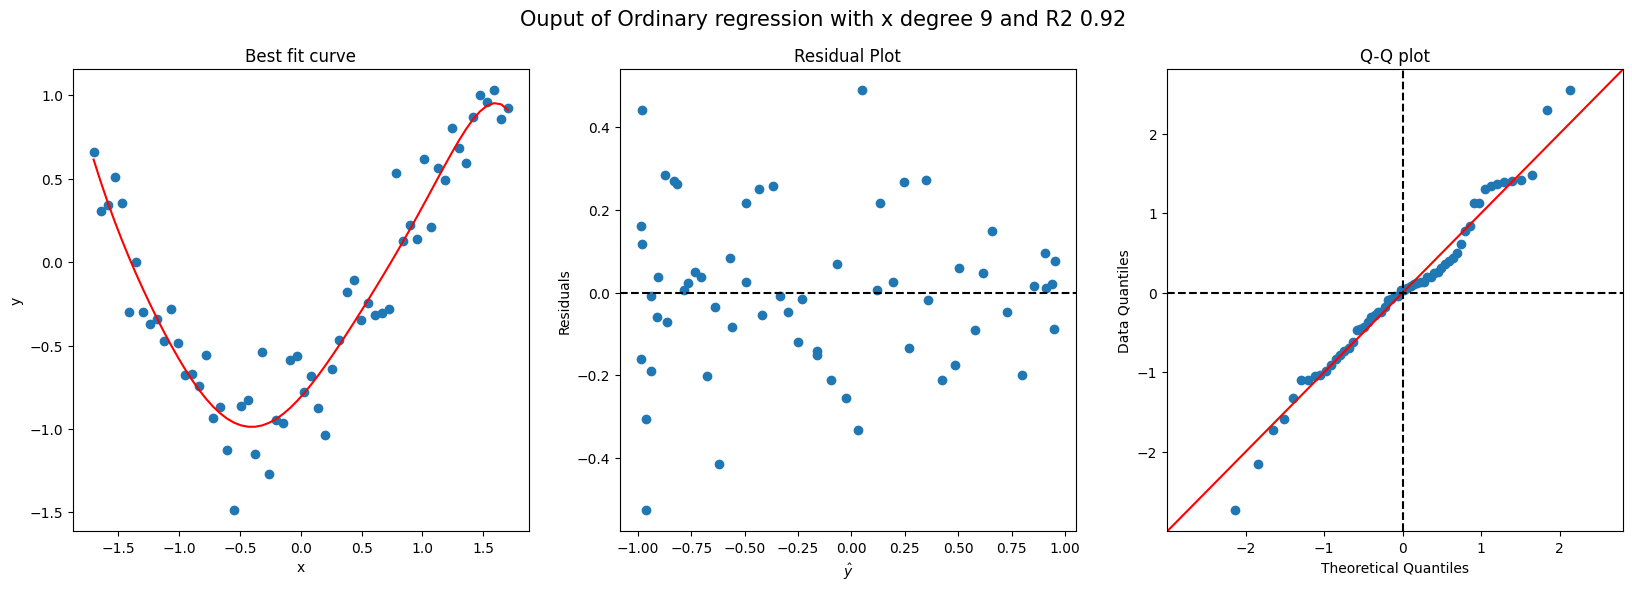

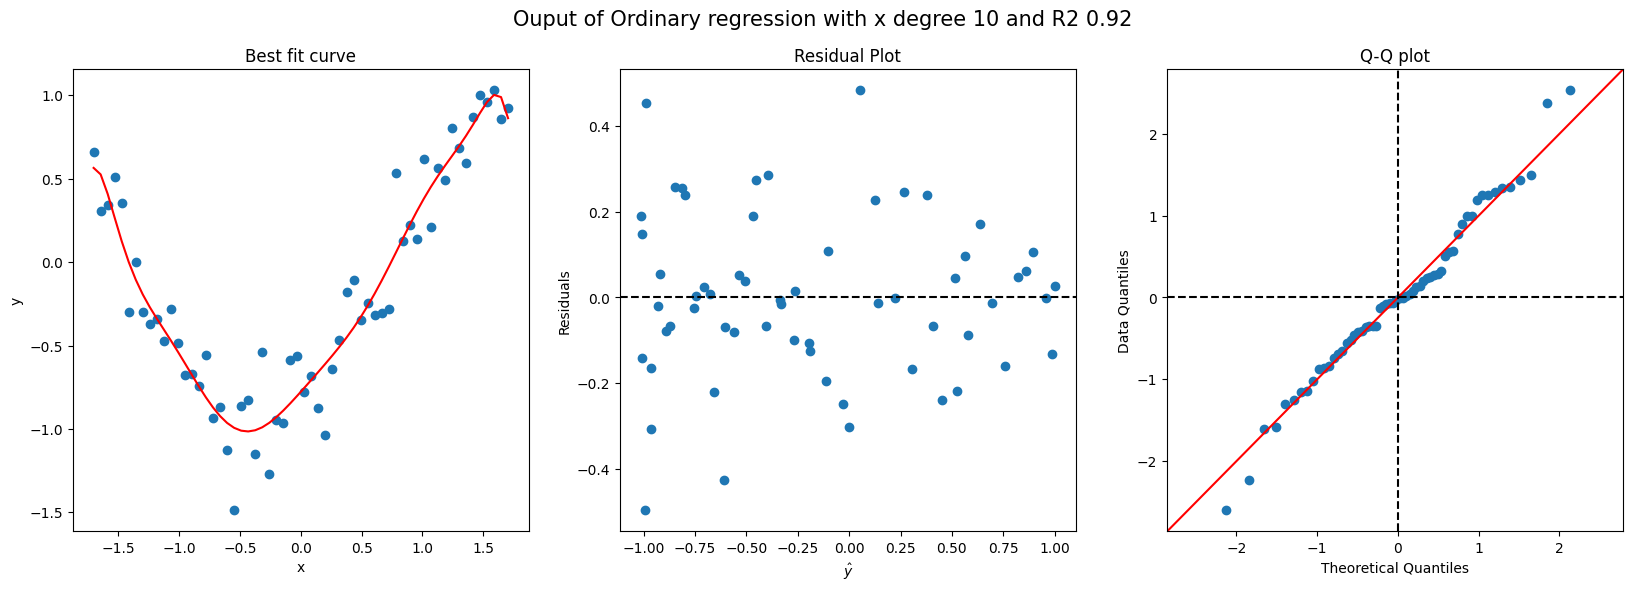

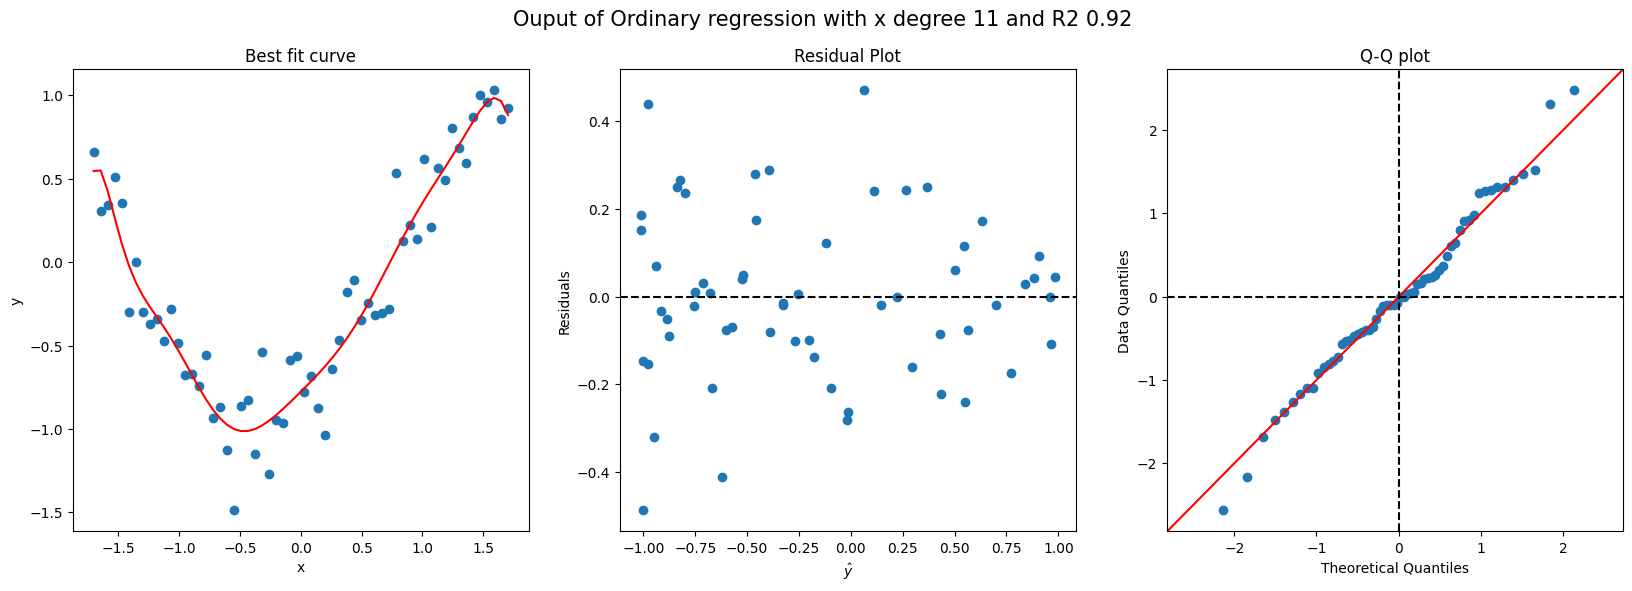

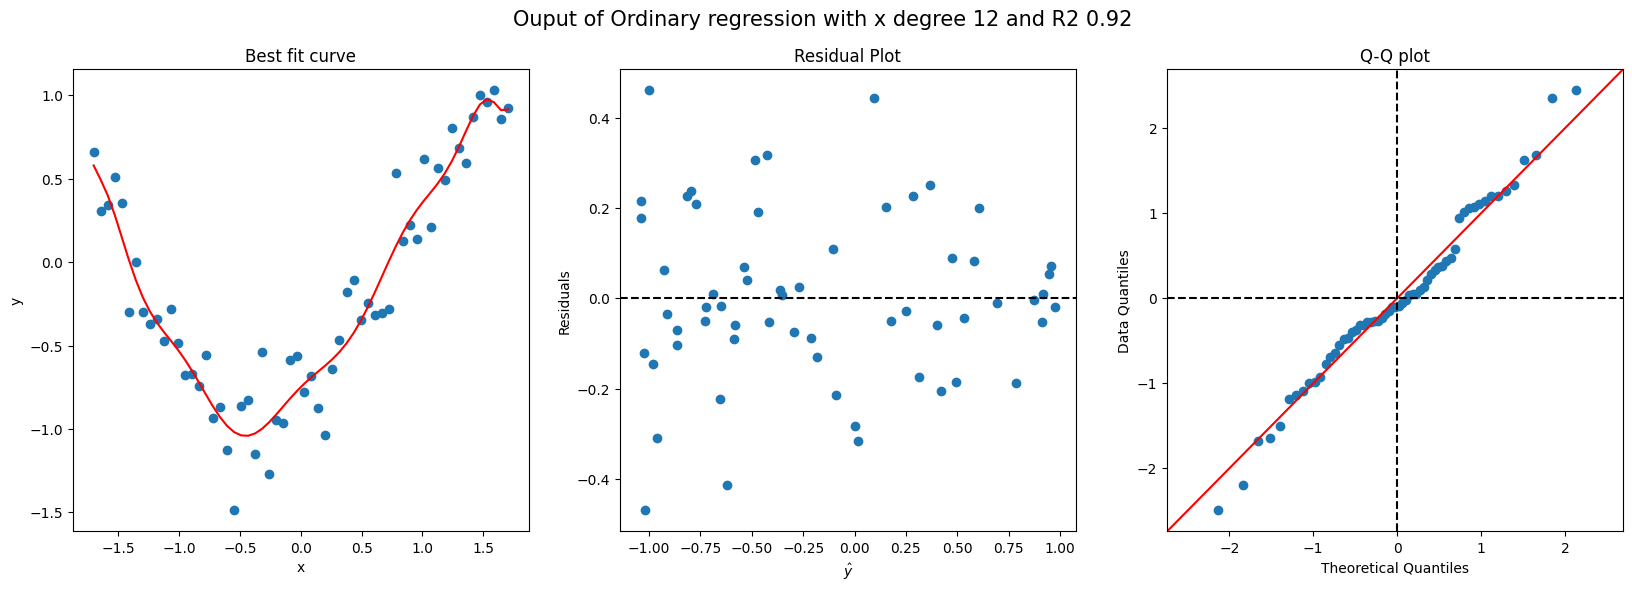

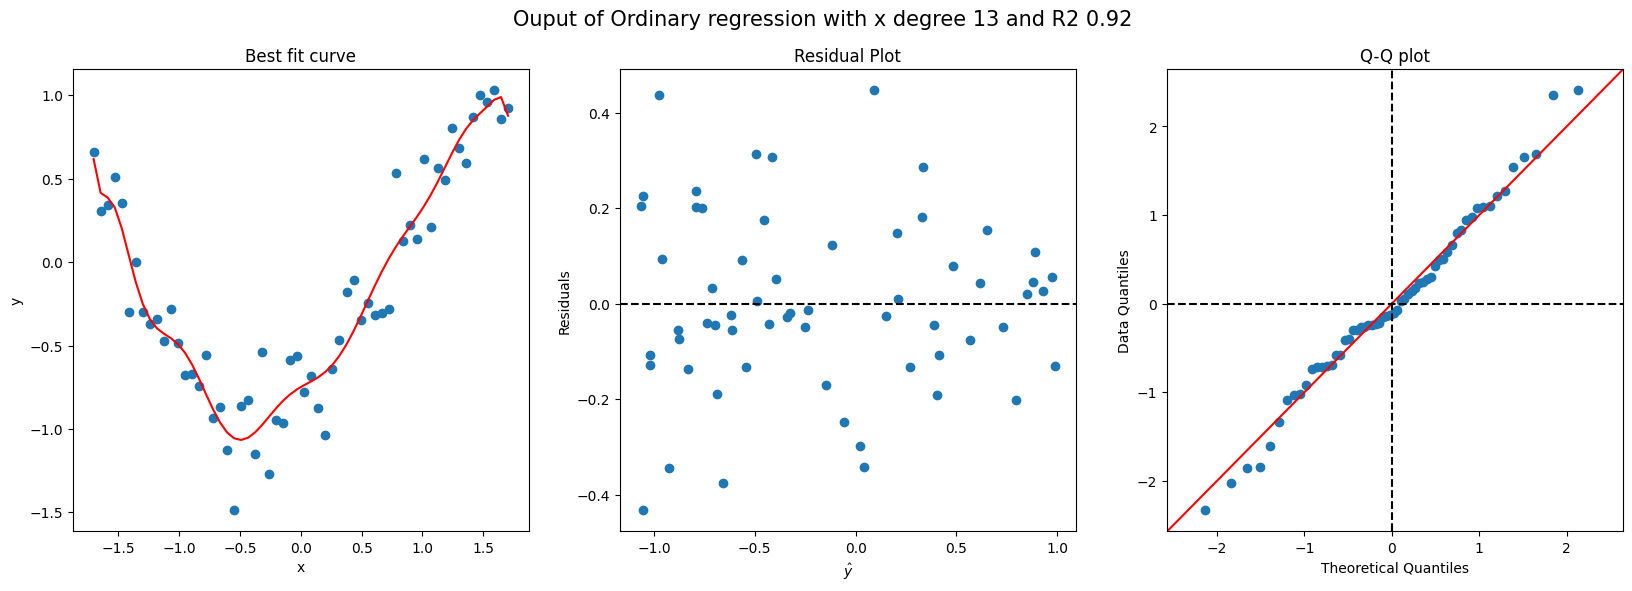

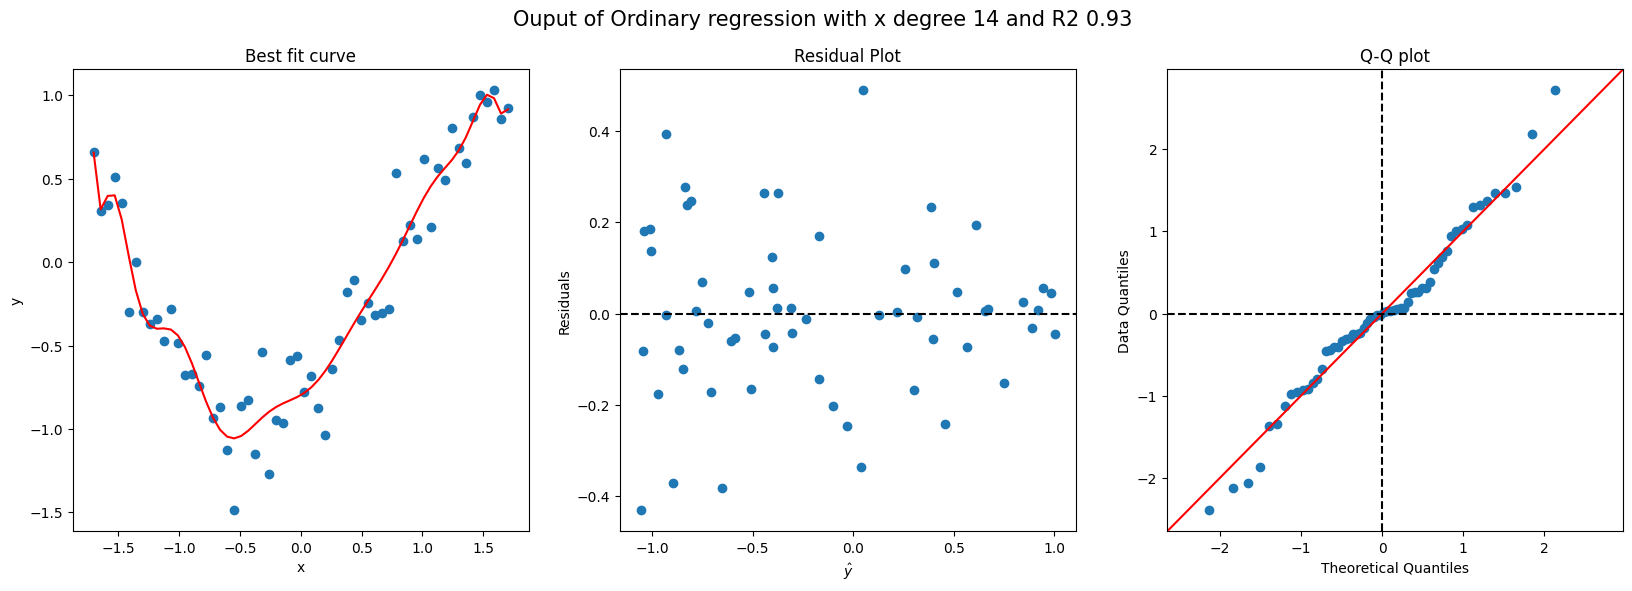

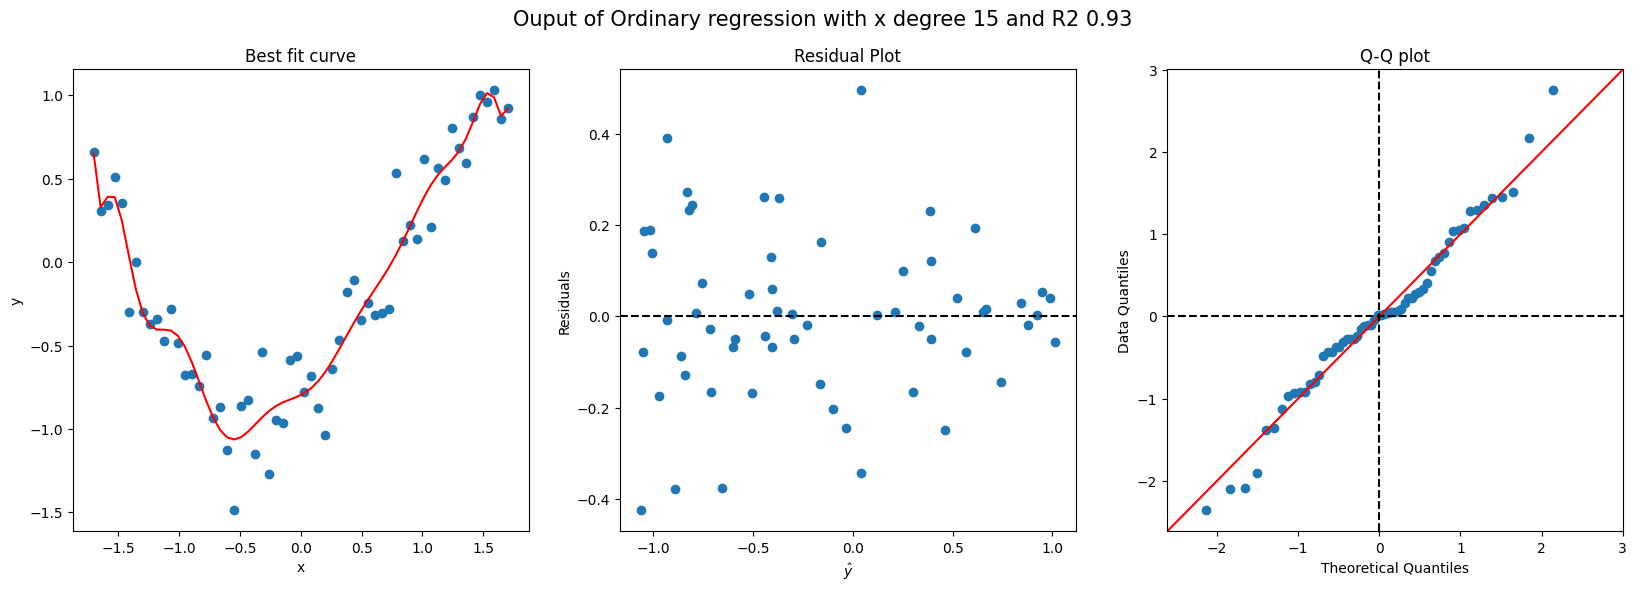

In [ ]:
Model_fit('Ordinary',LinearRegression(),1,16)

##Ridge Regression

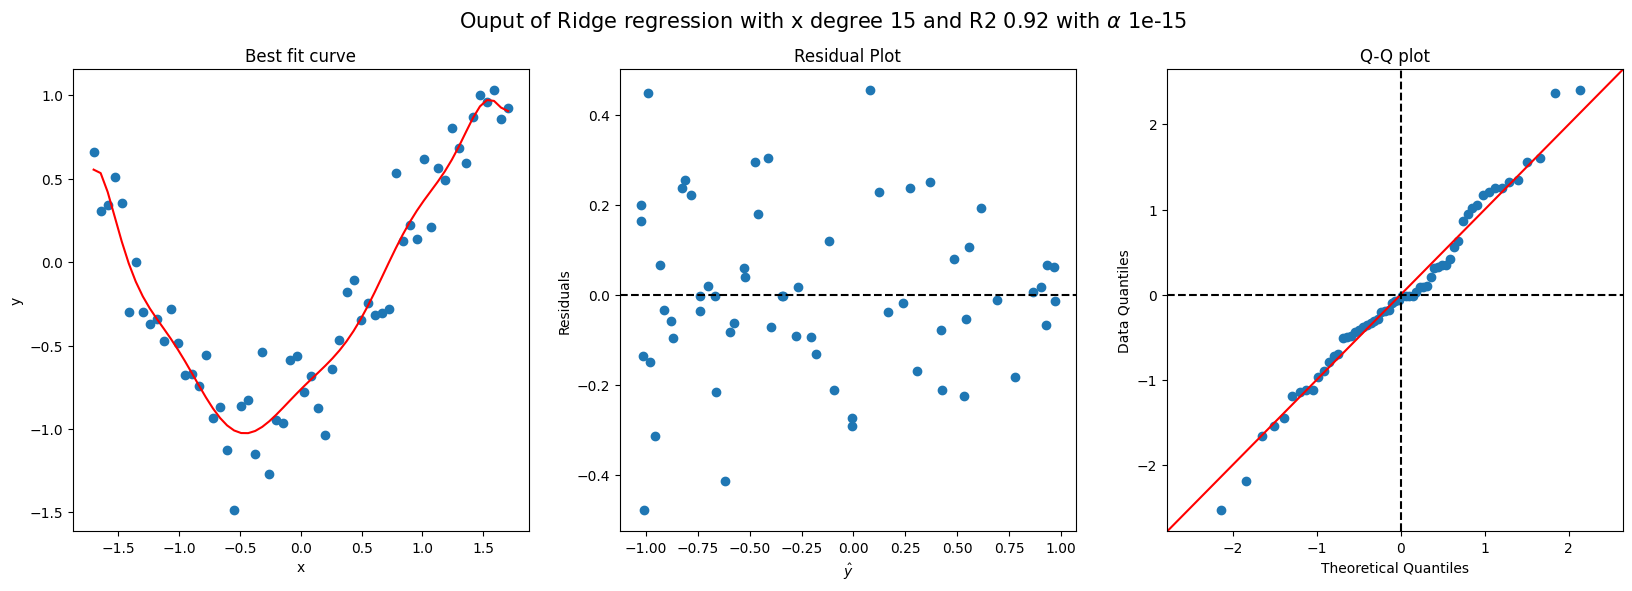

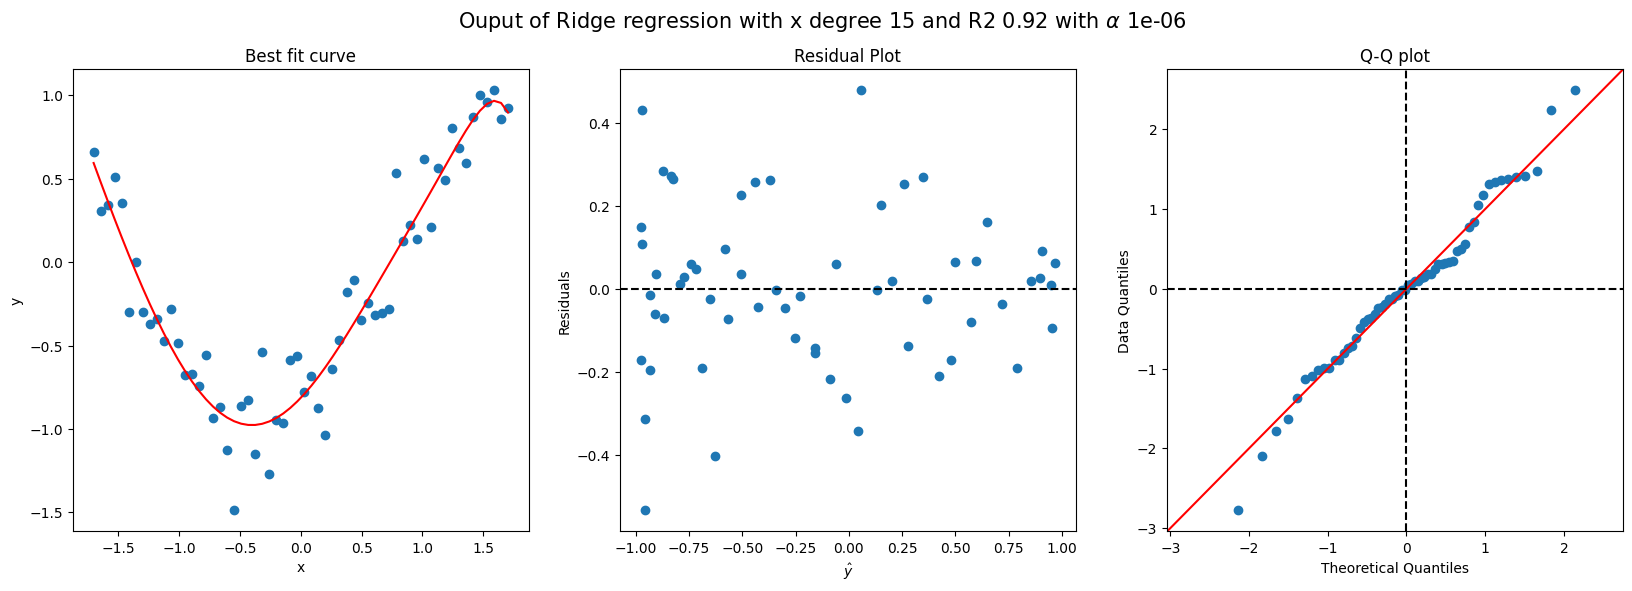

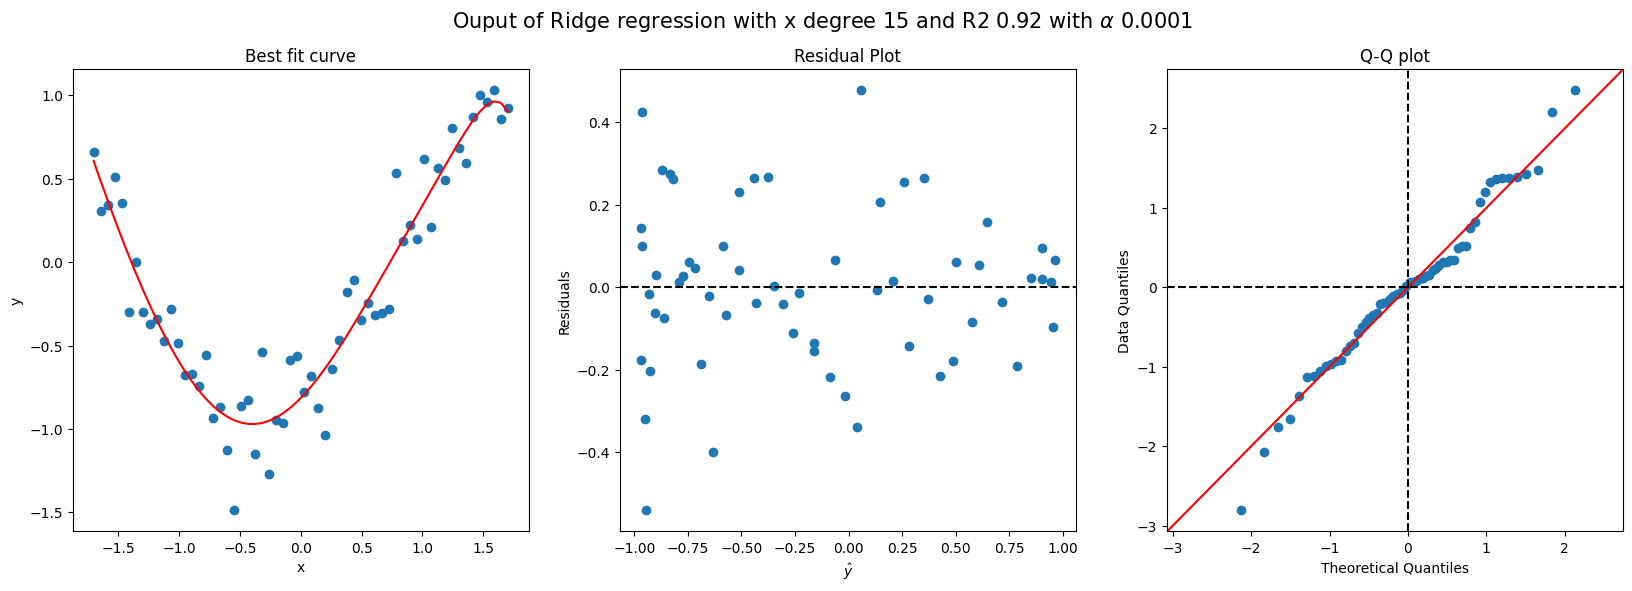

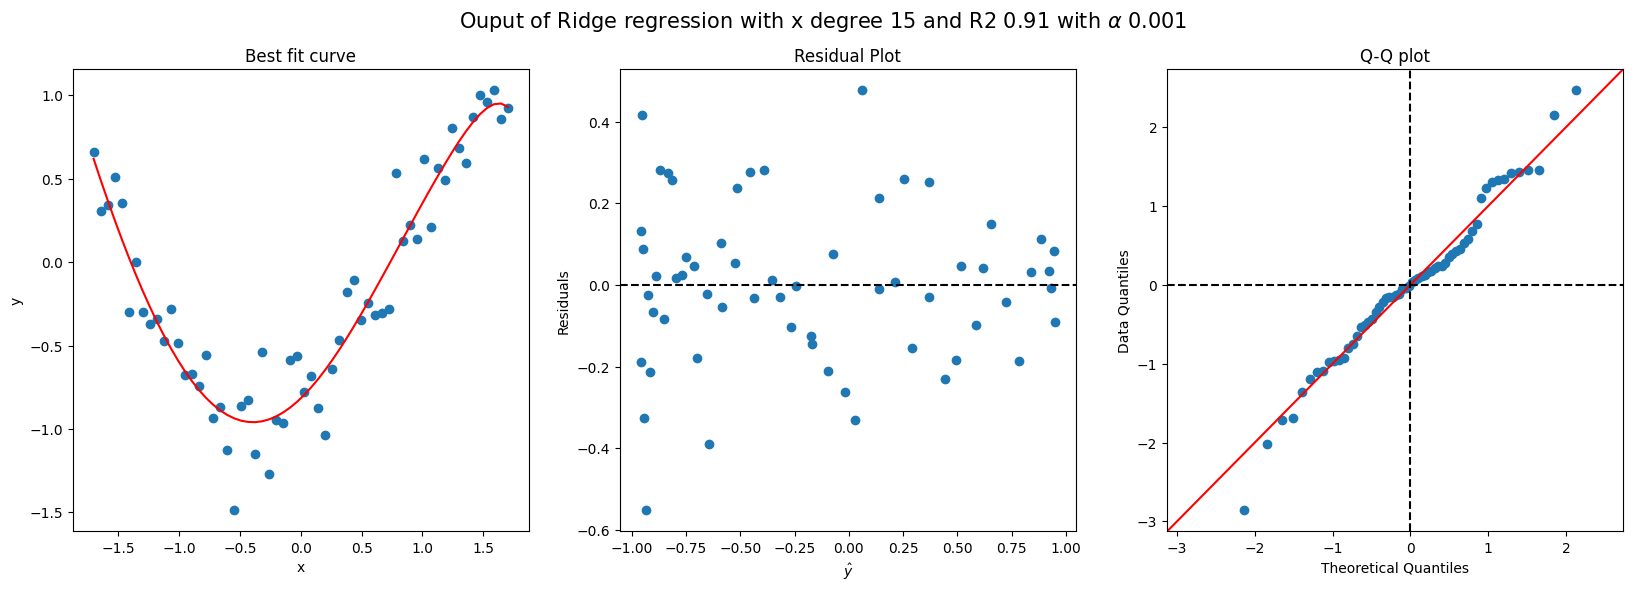

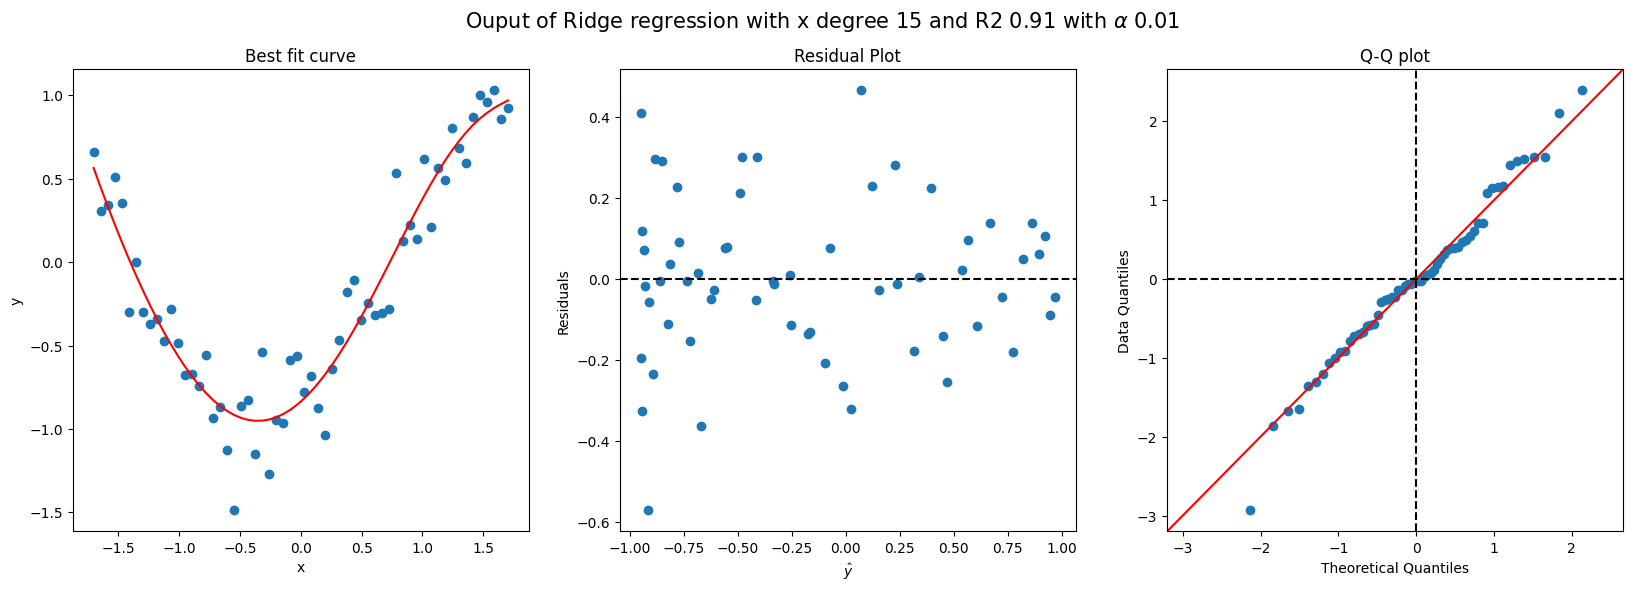

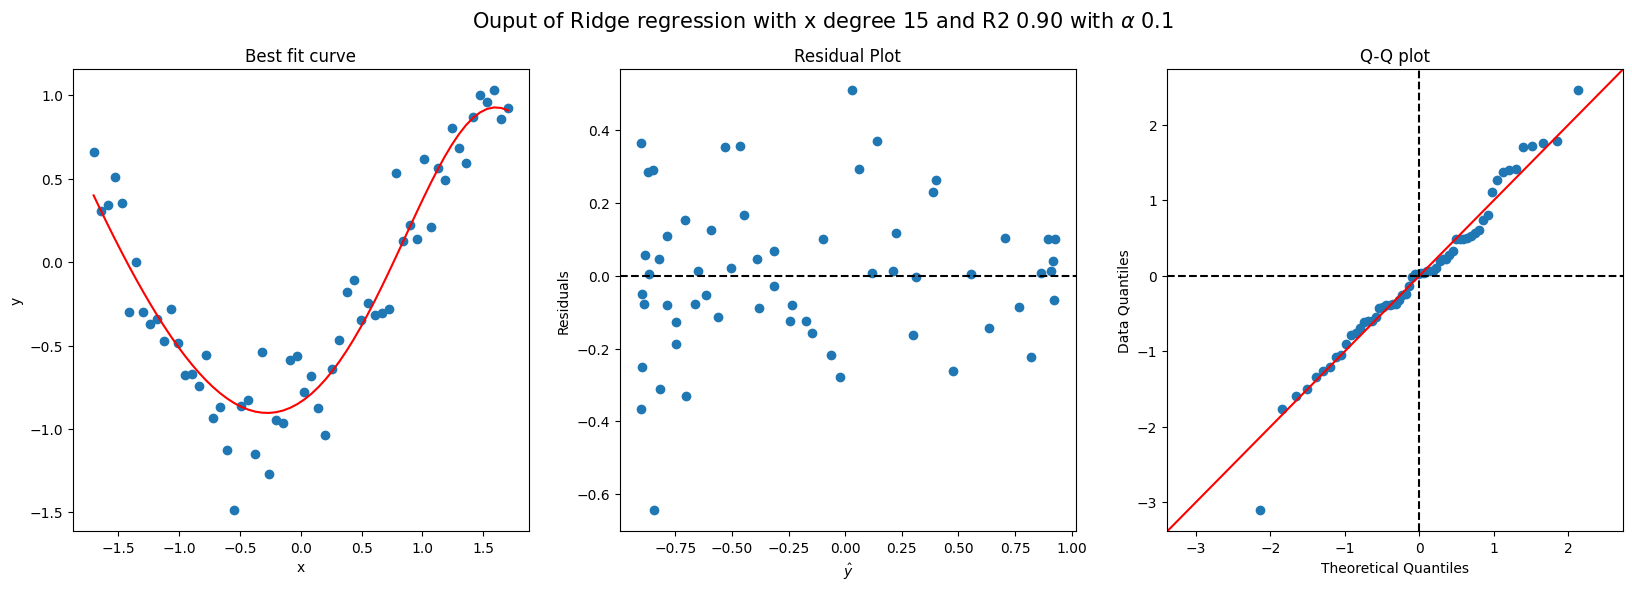

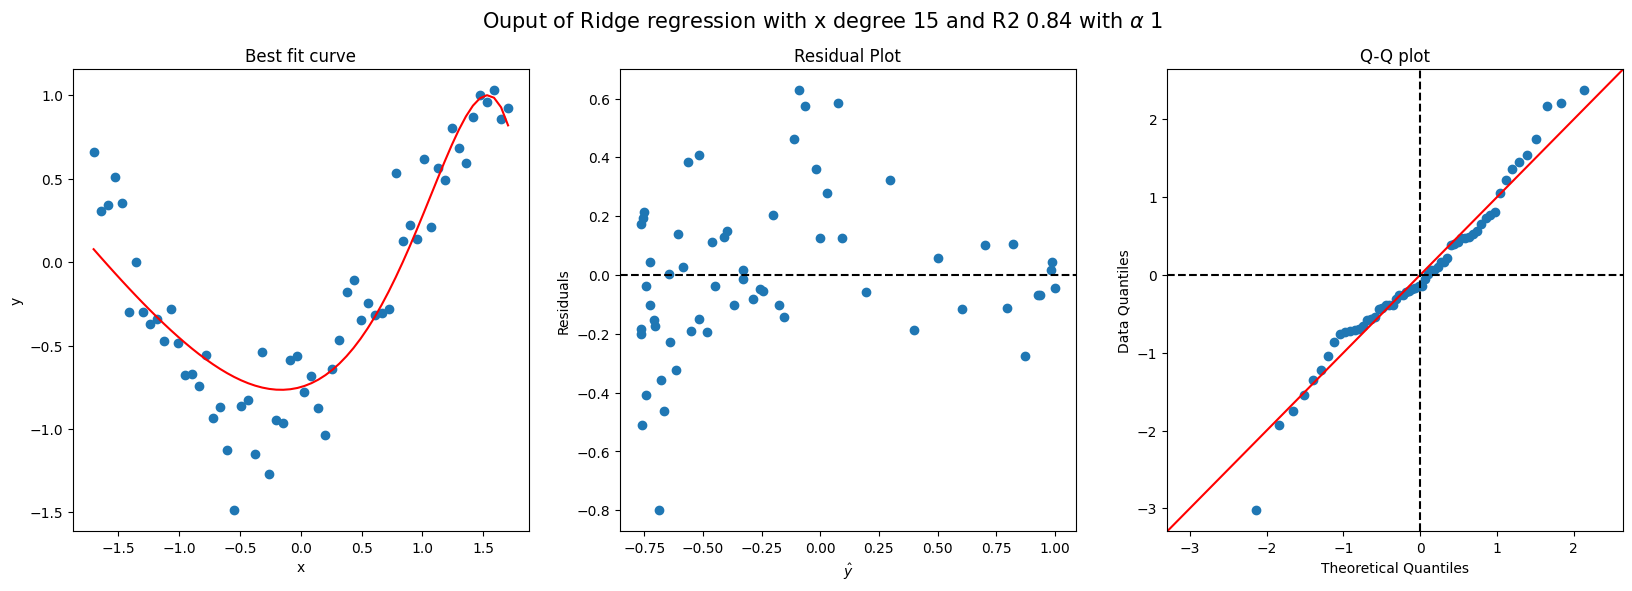

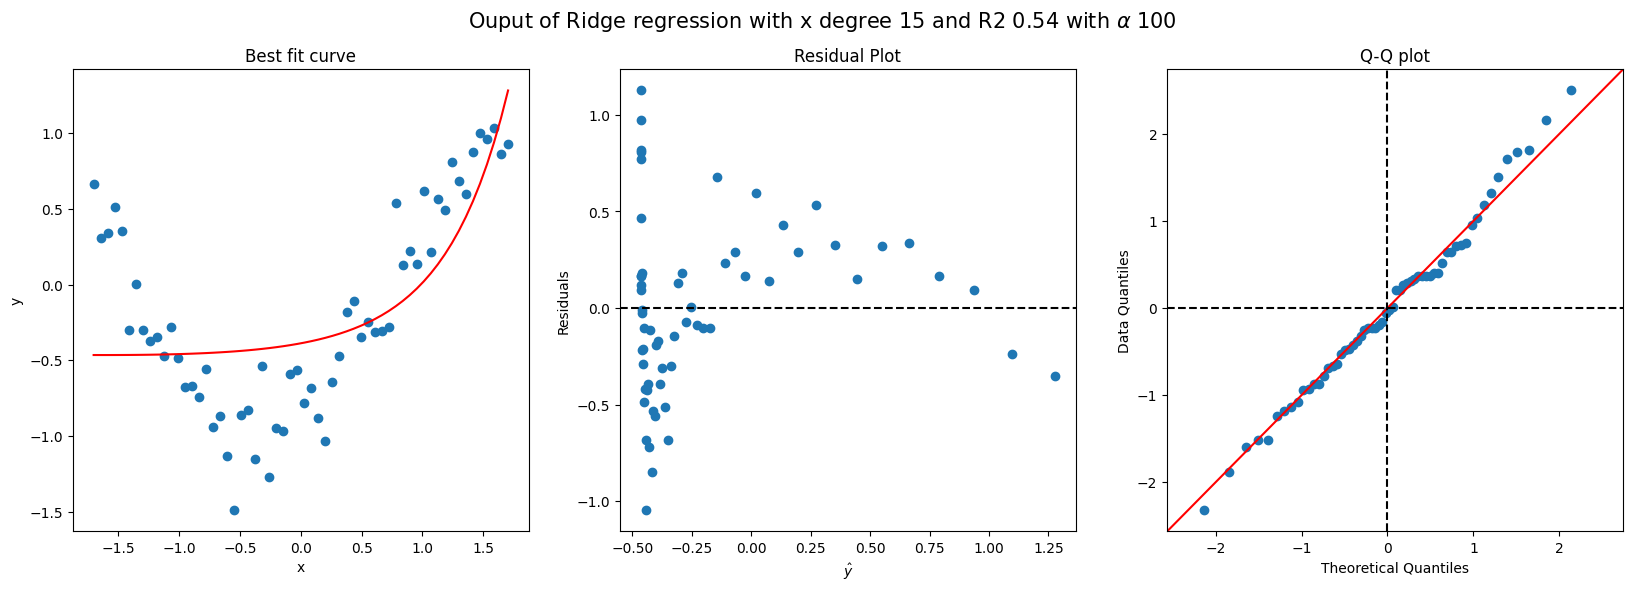

In [ ]:
alpha=[1e-15,1e-6,1e-4,1e-3,1e-2,1e-1,1,100]
for alph in alpha:
  Model_fit('Ridge',Ridge(alpha=alph),15,16,alpha=alph)

##Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+00, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


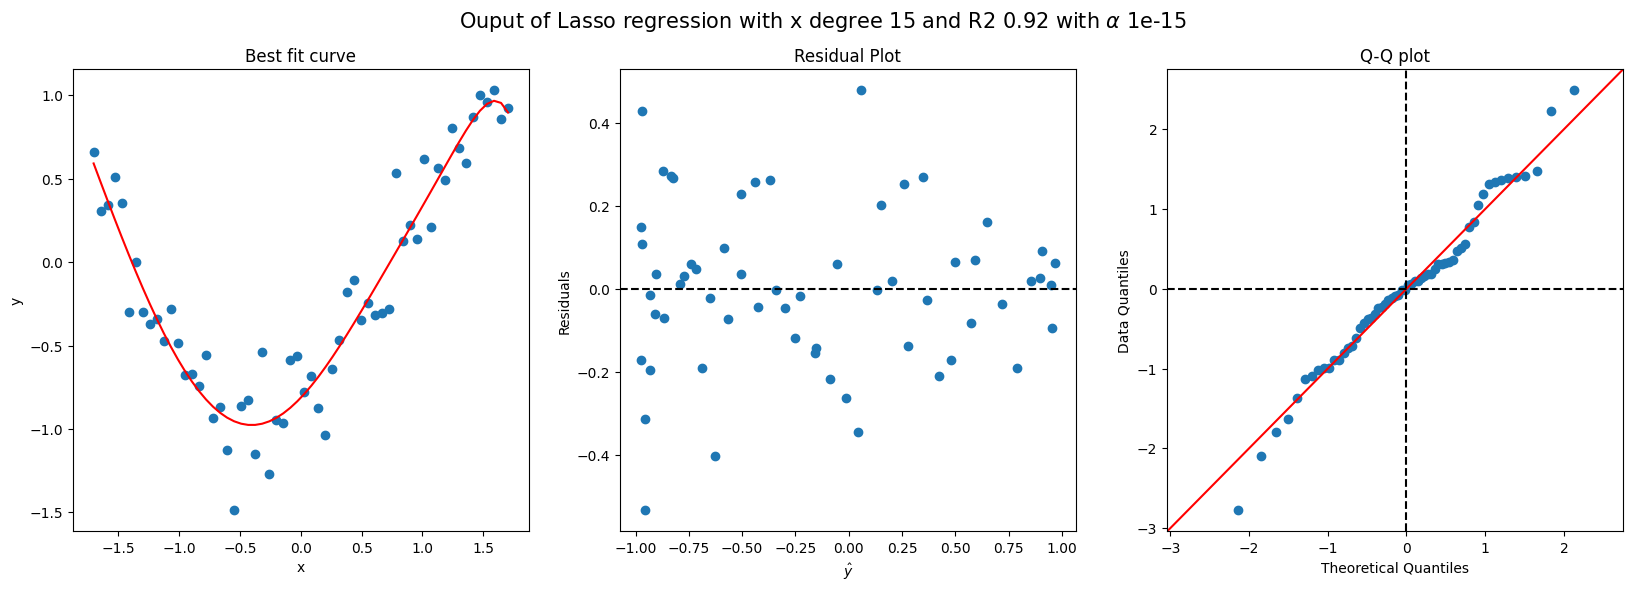

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.960e-03, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


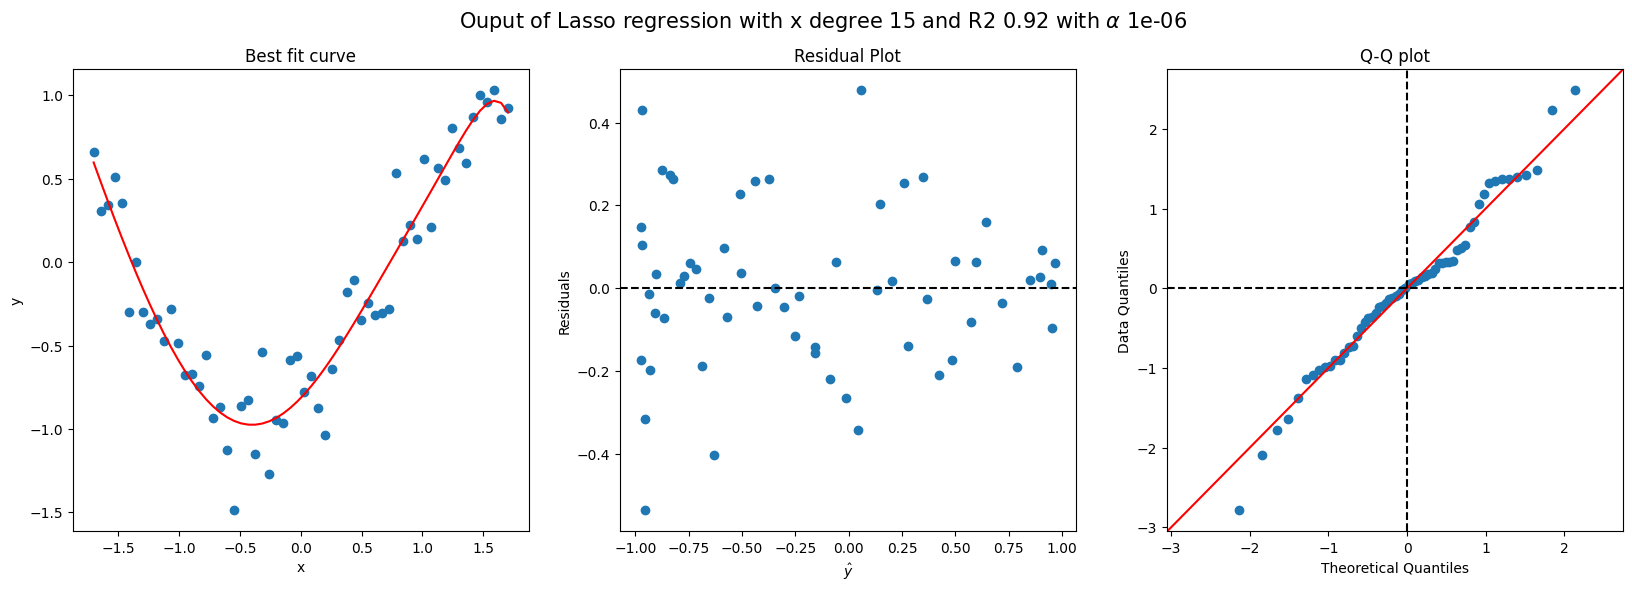

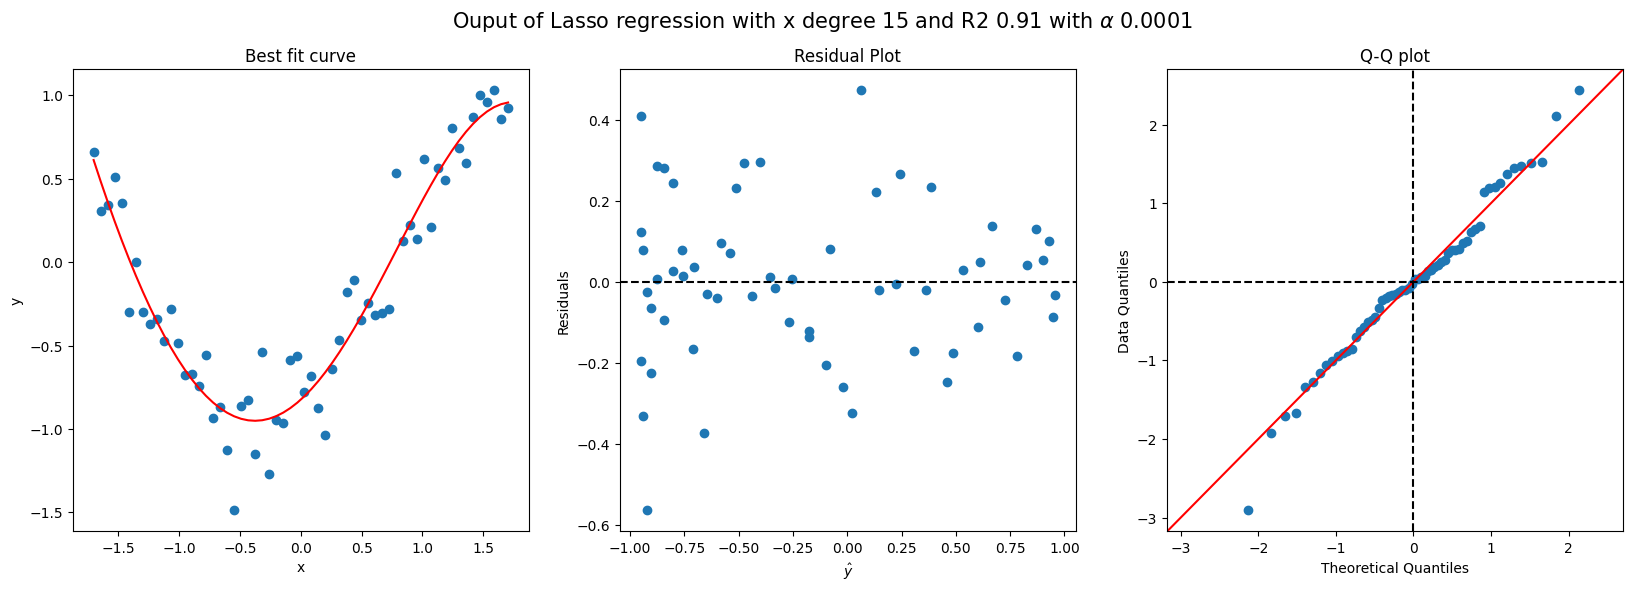

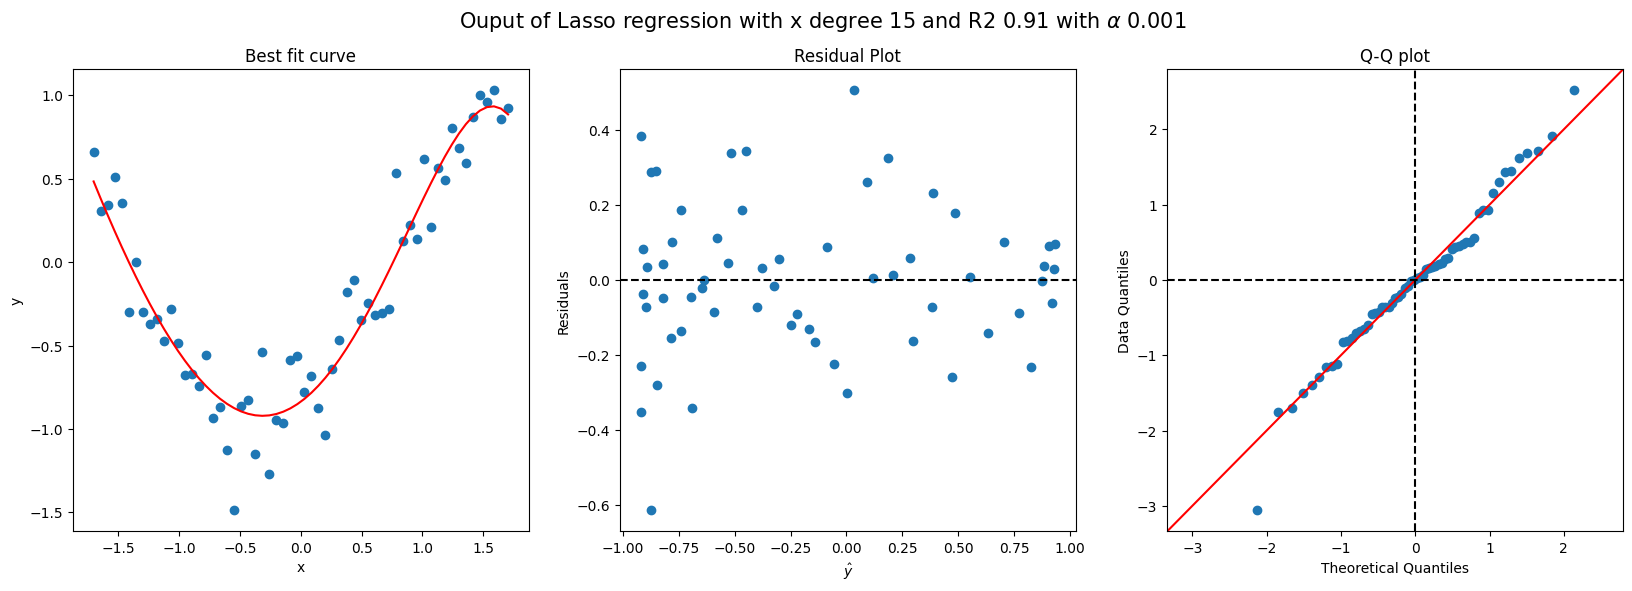

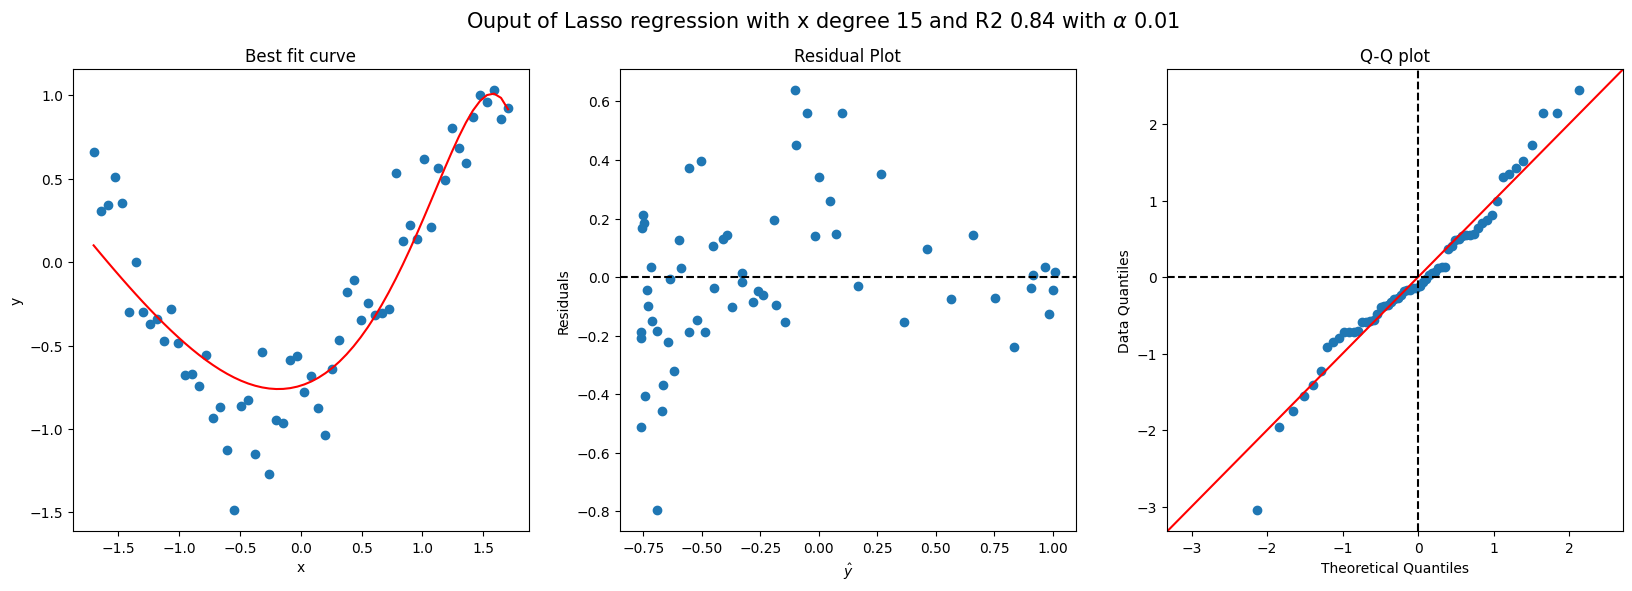

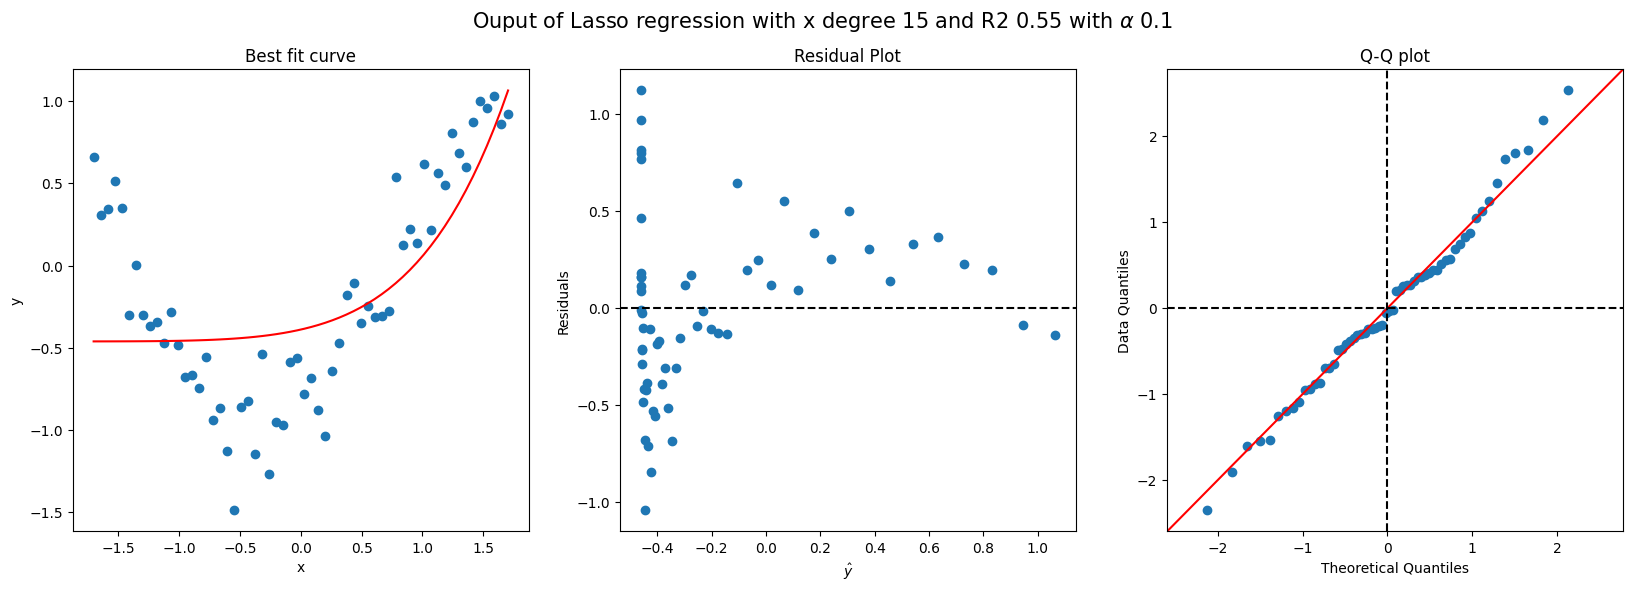

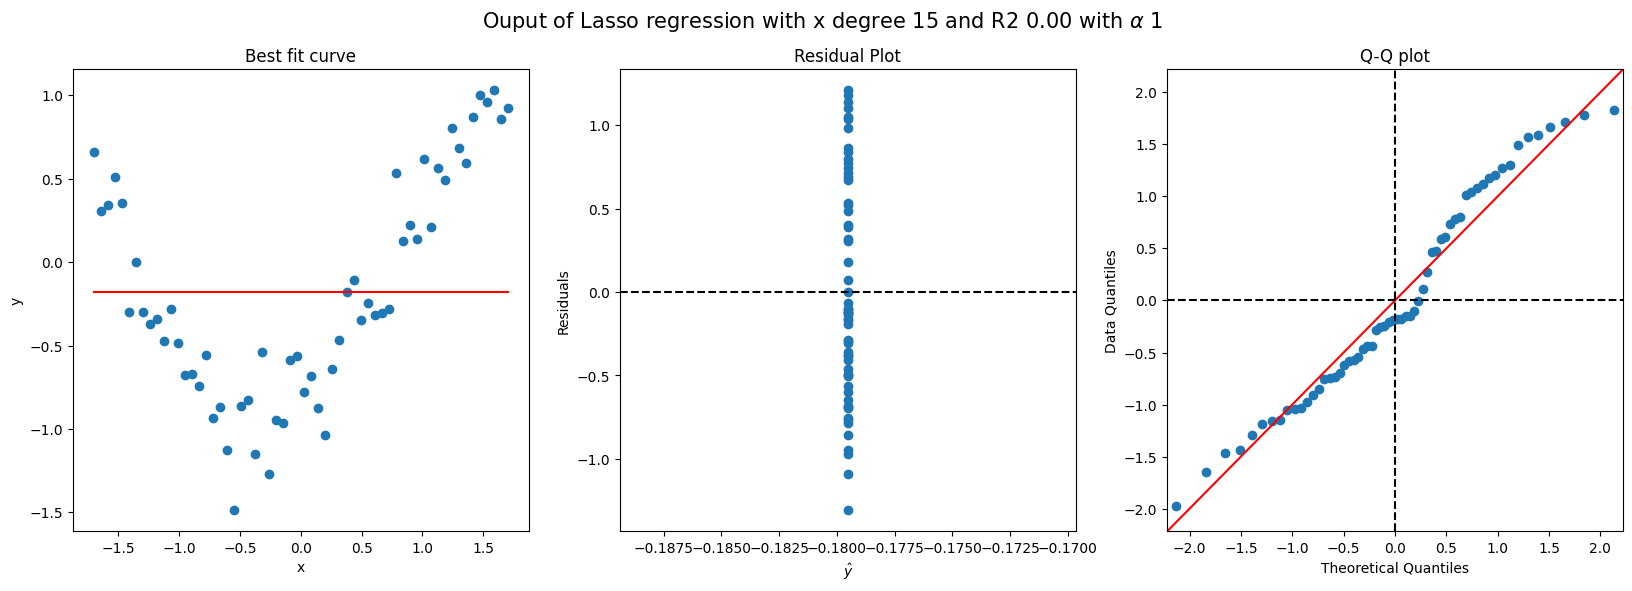

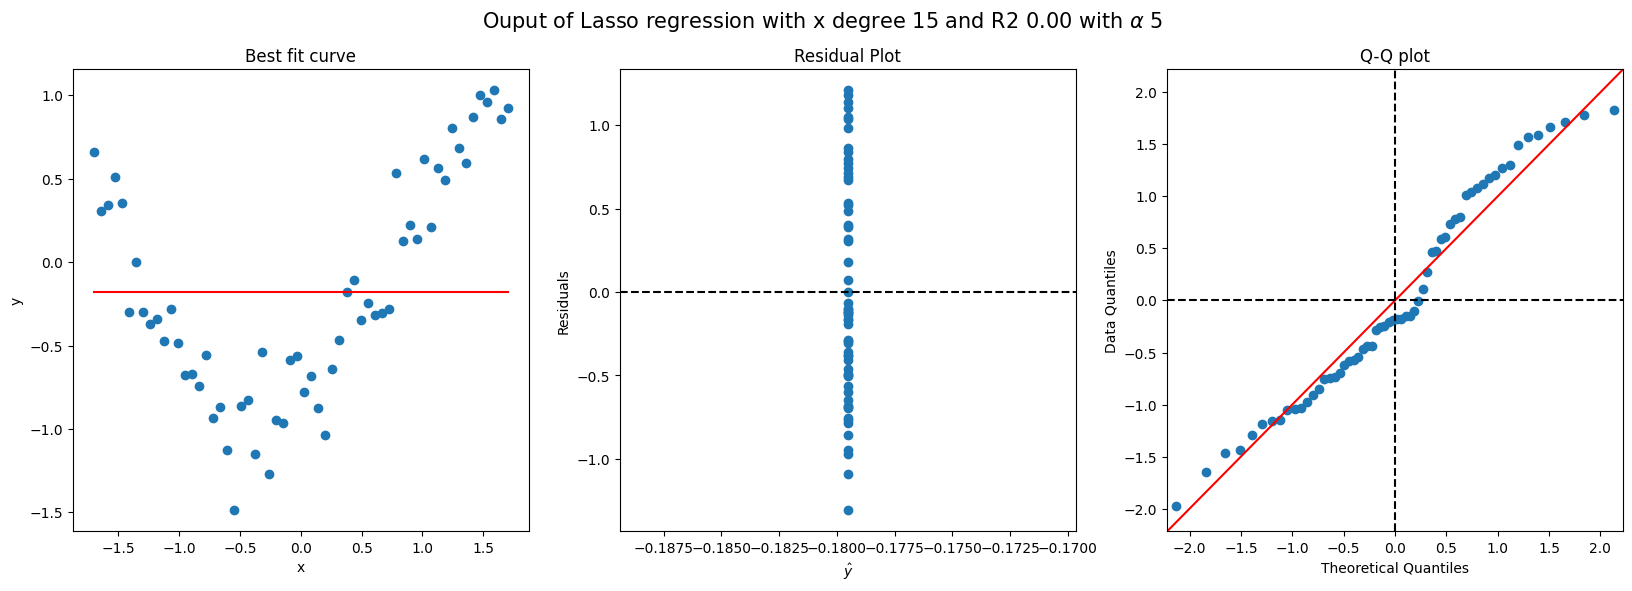

In [69]:
alpha=[1e-15,1e-6,1e-4,1e-3,1e-2,1e-1,1,5]
for alph in alpha:
  Model_fit('Lasso',Lasso(alpha=alph,max_iter=10000000),15,16,alpha=alph)

##Part 2

##Unregularized regression have good model fitting 7 to 9 number of features. Above 9 model overfits. So least number of features 7

From the above plots we decided to keep Alpha $10^{-6}$ for ridge and Lasso check number of features in between 7-15



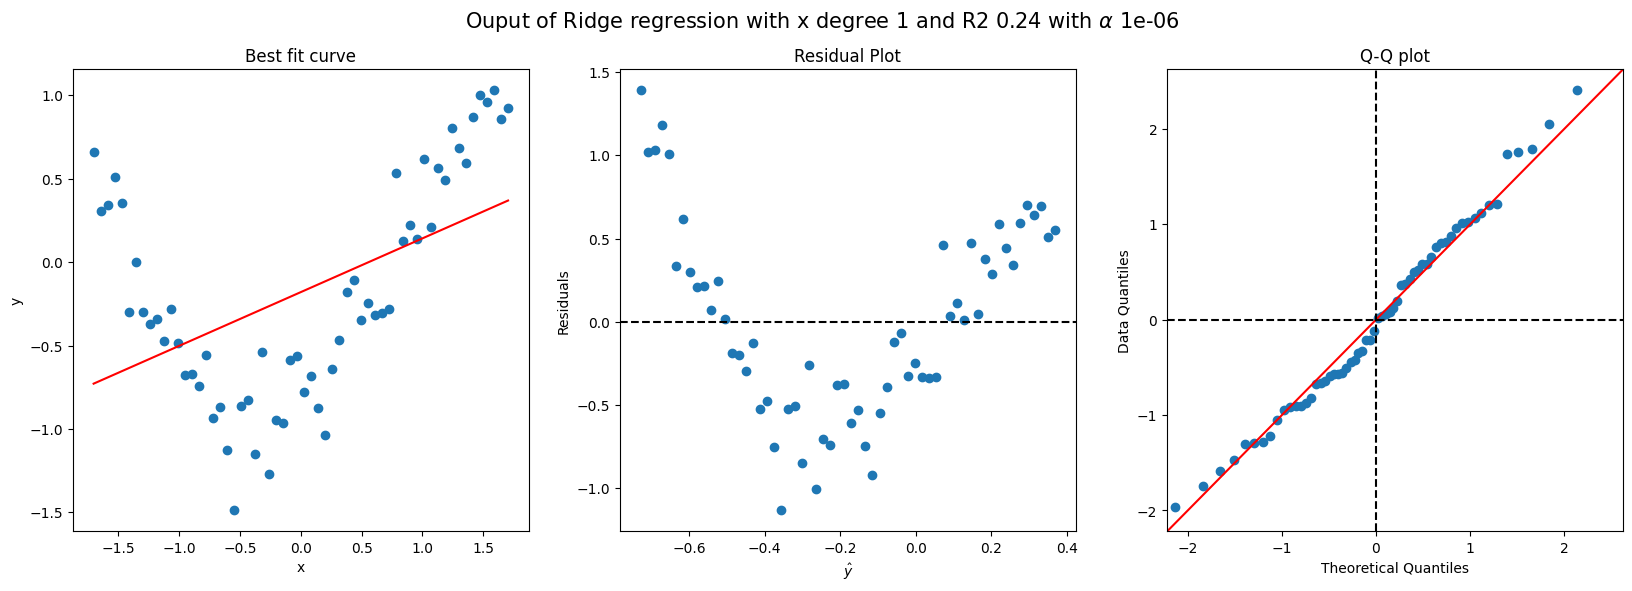

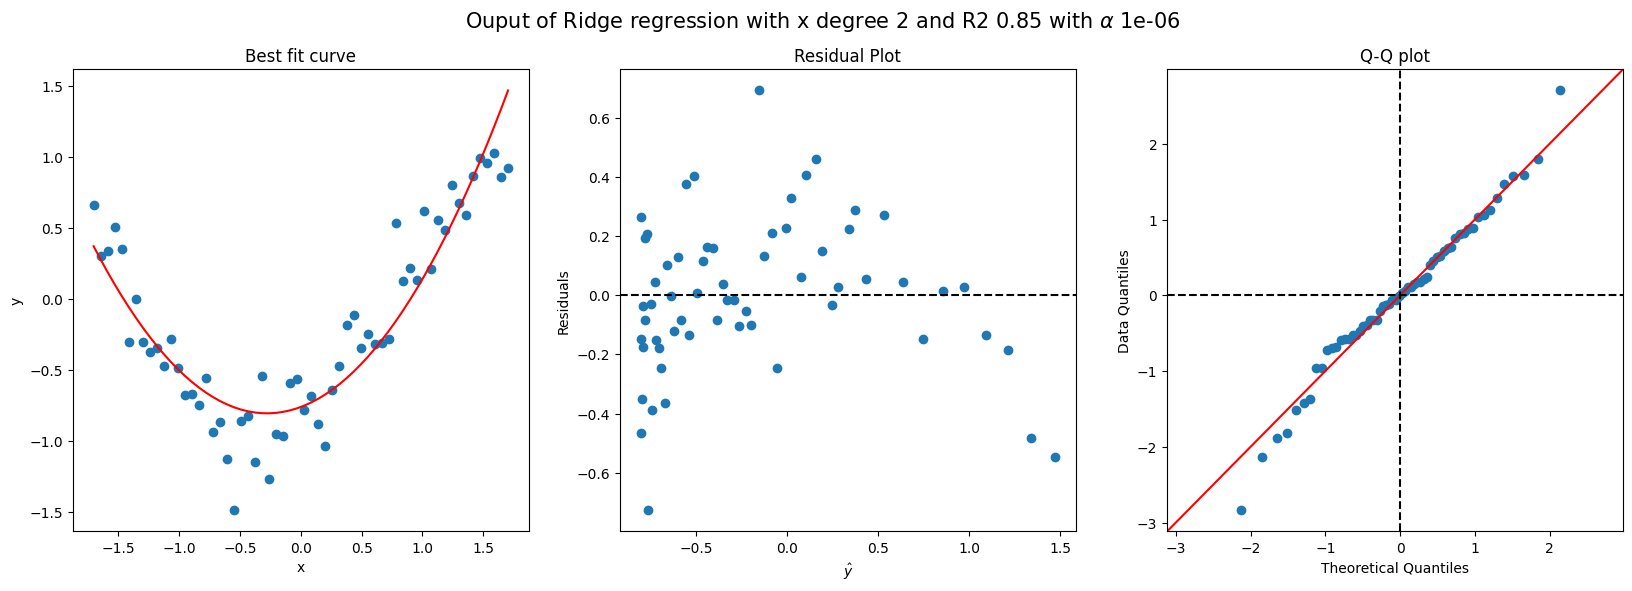

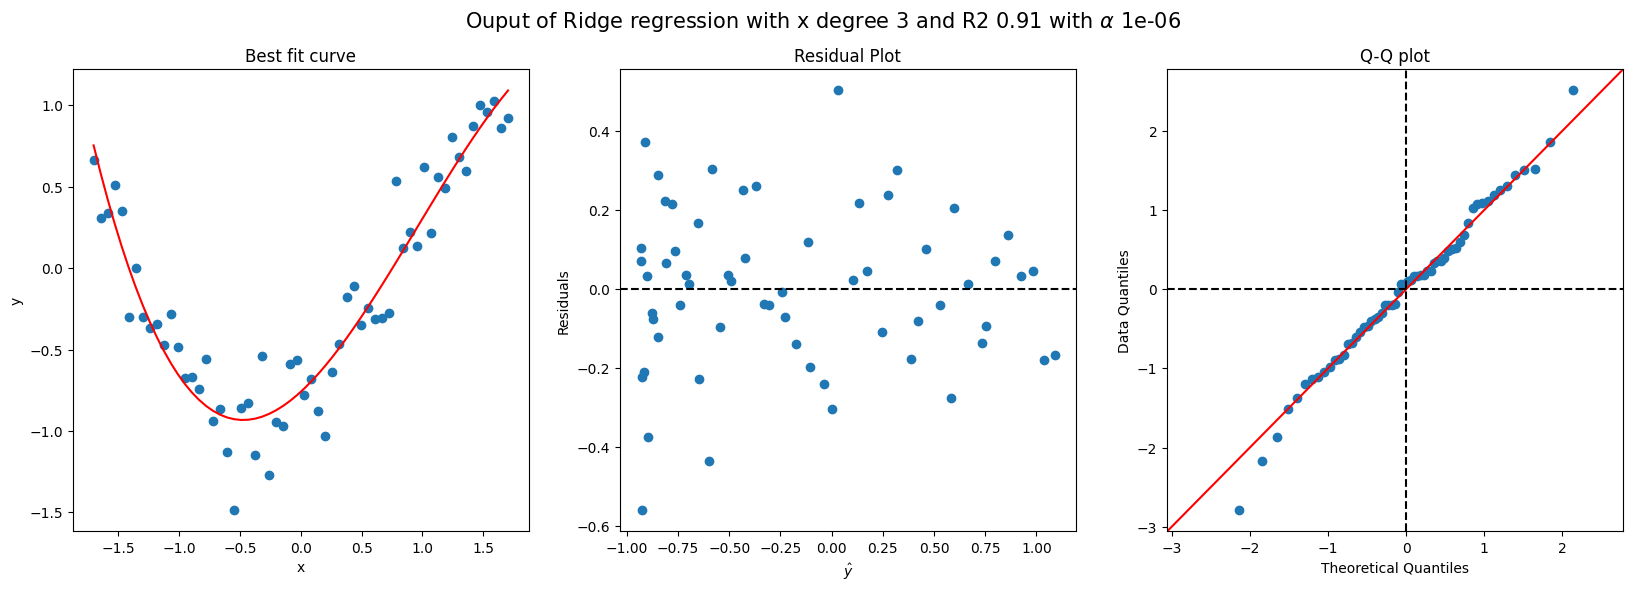

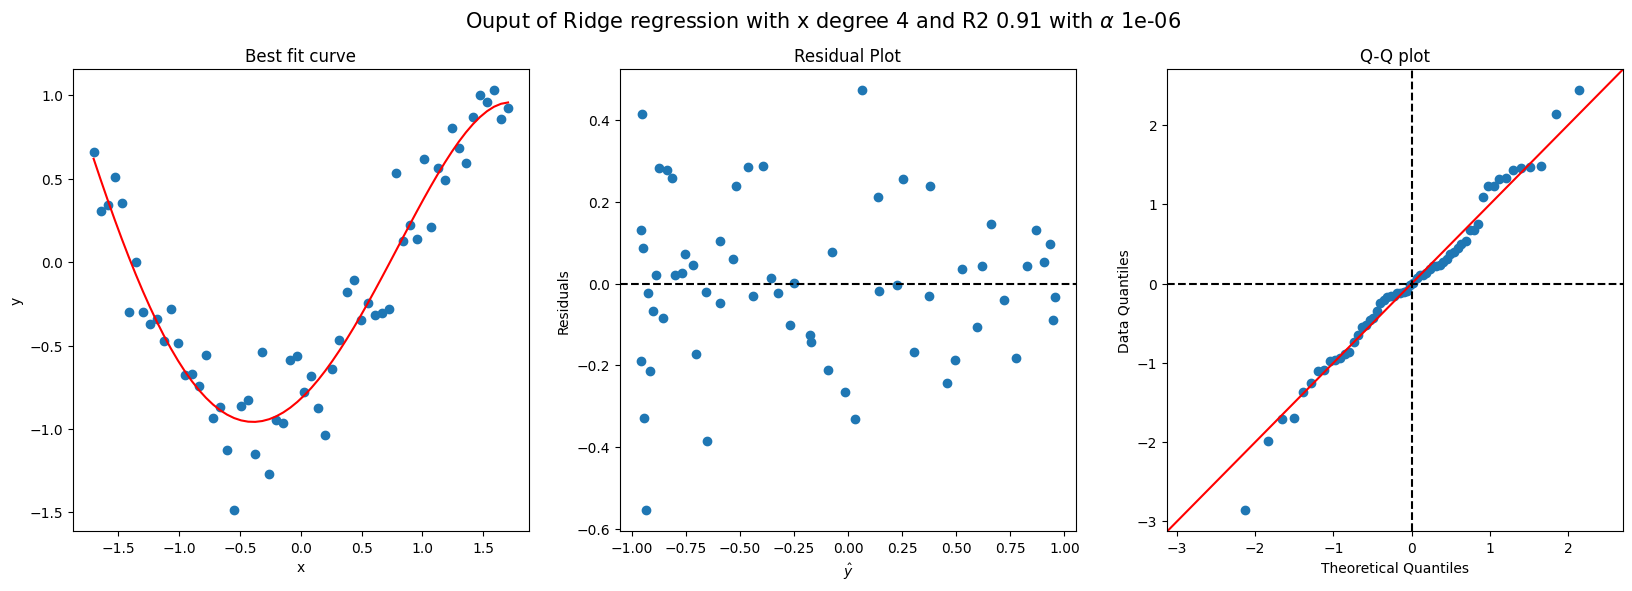

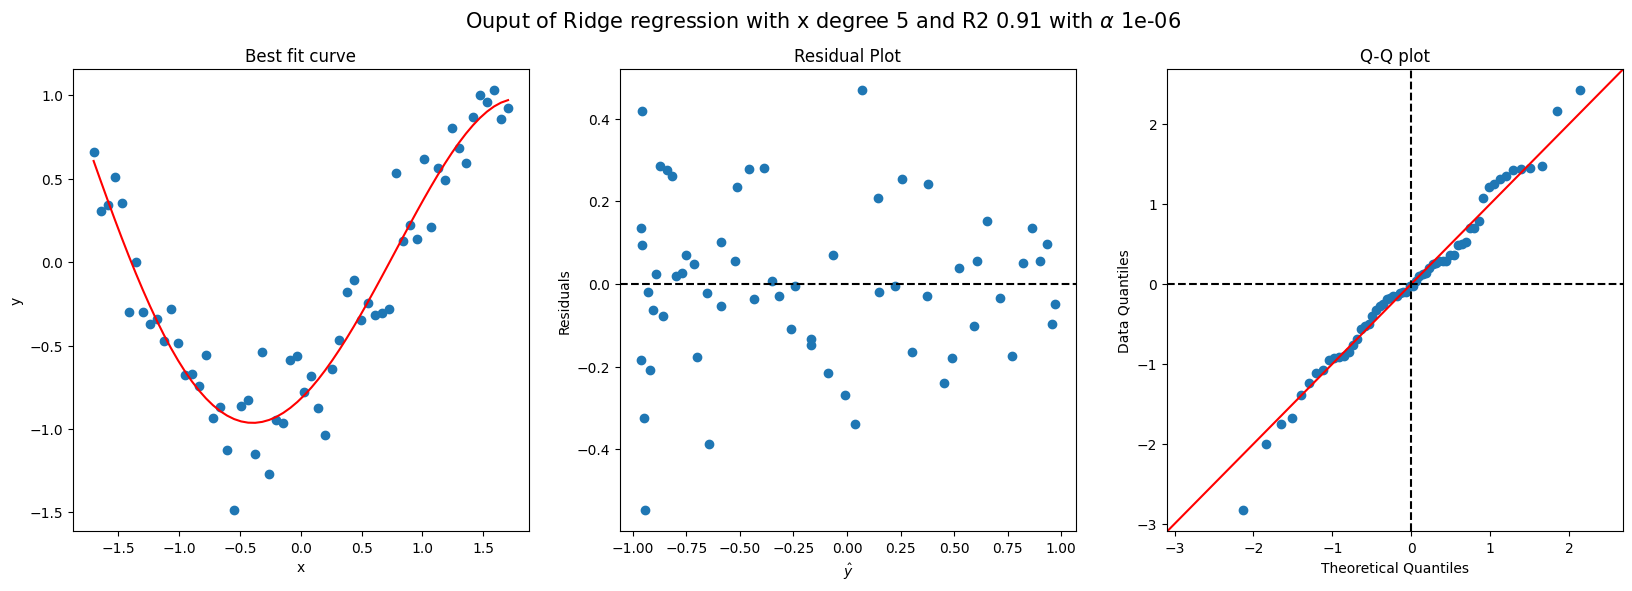

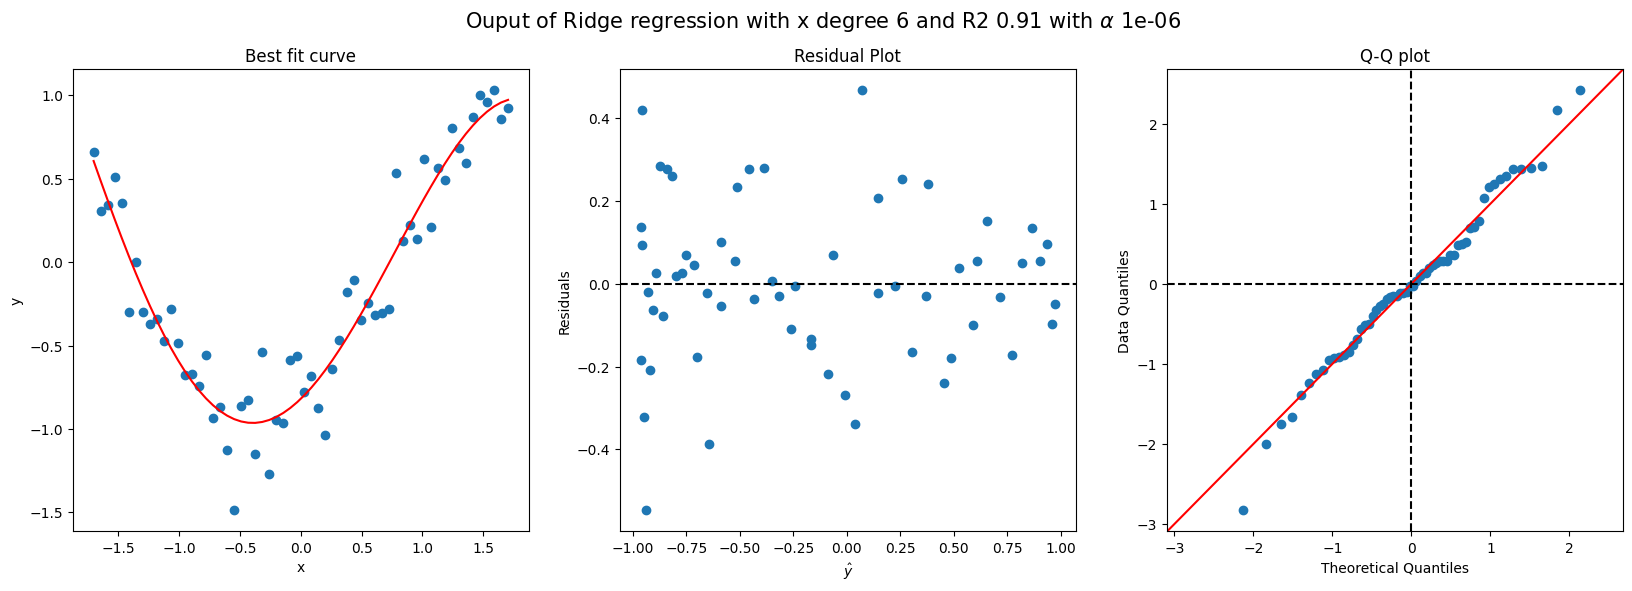

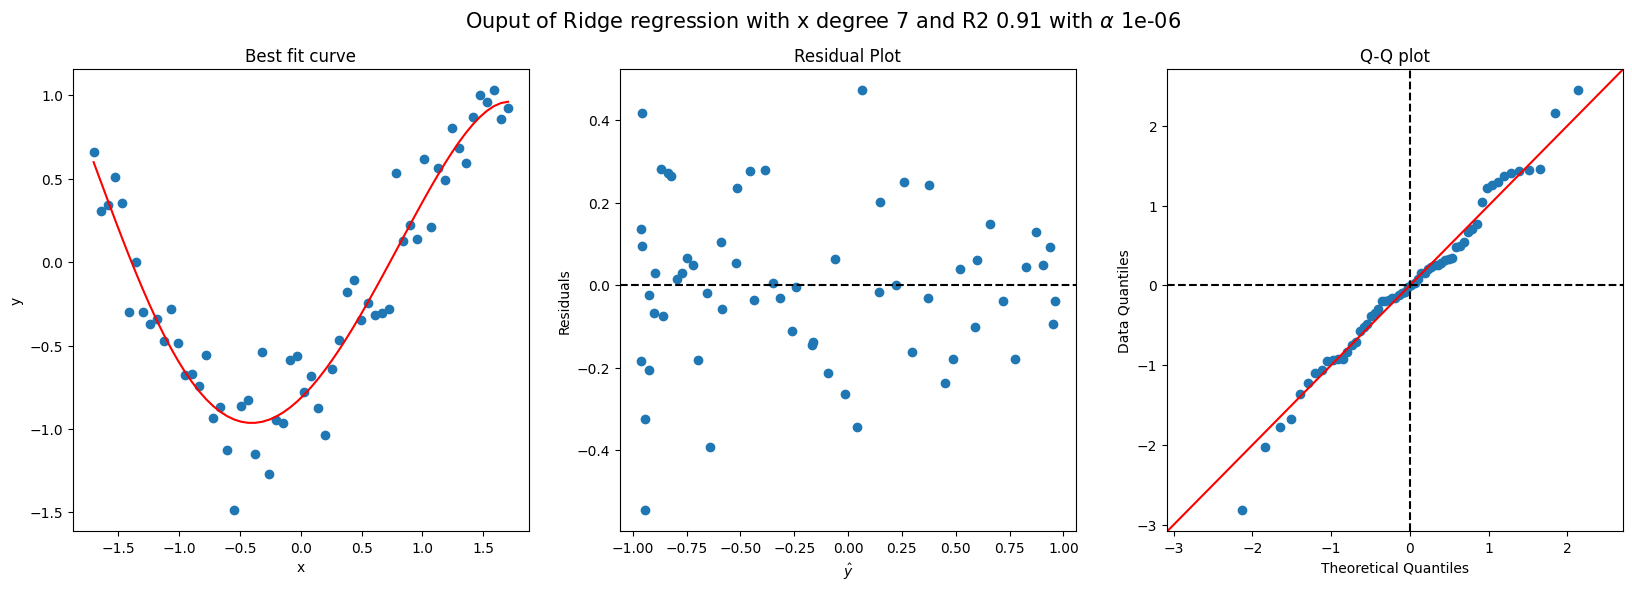

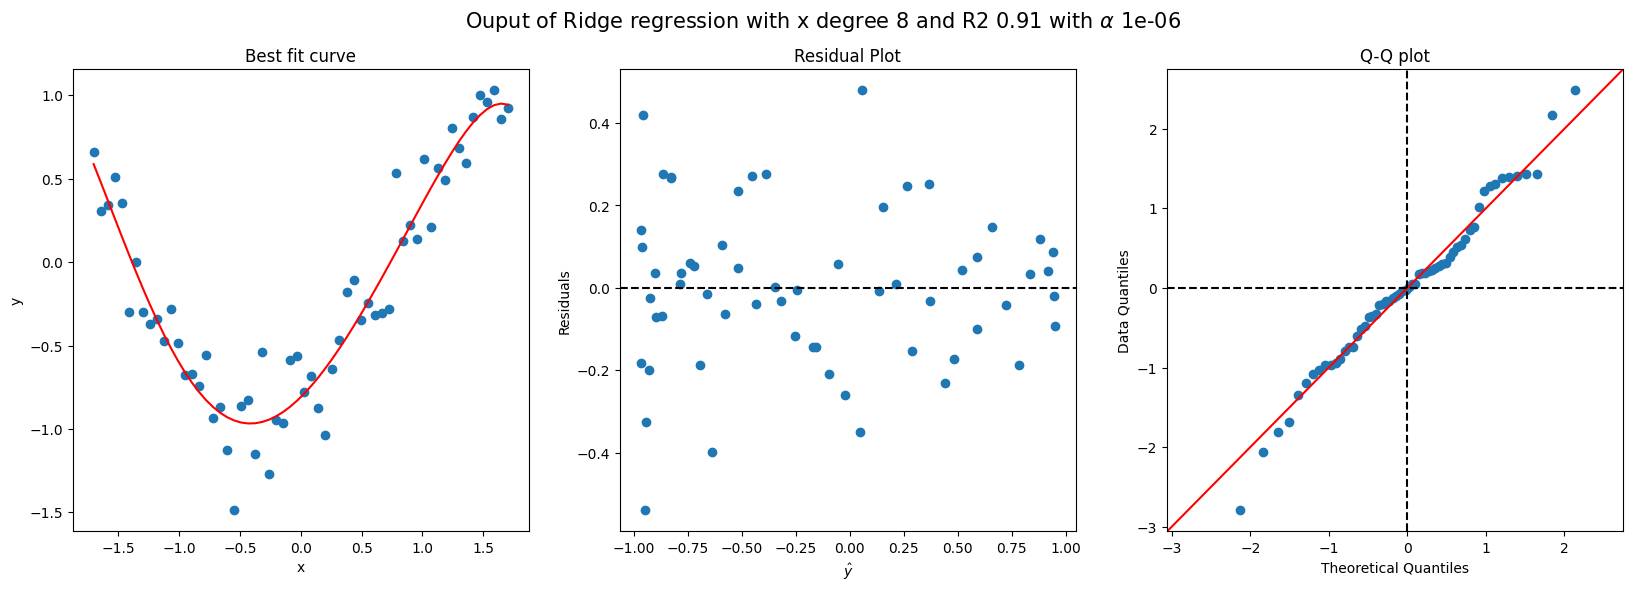

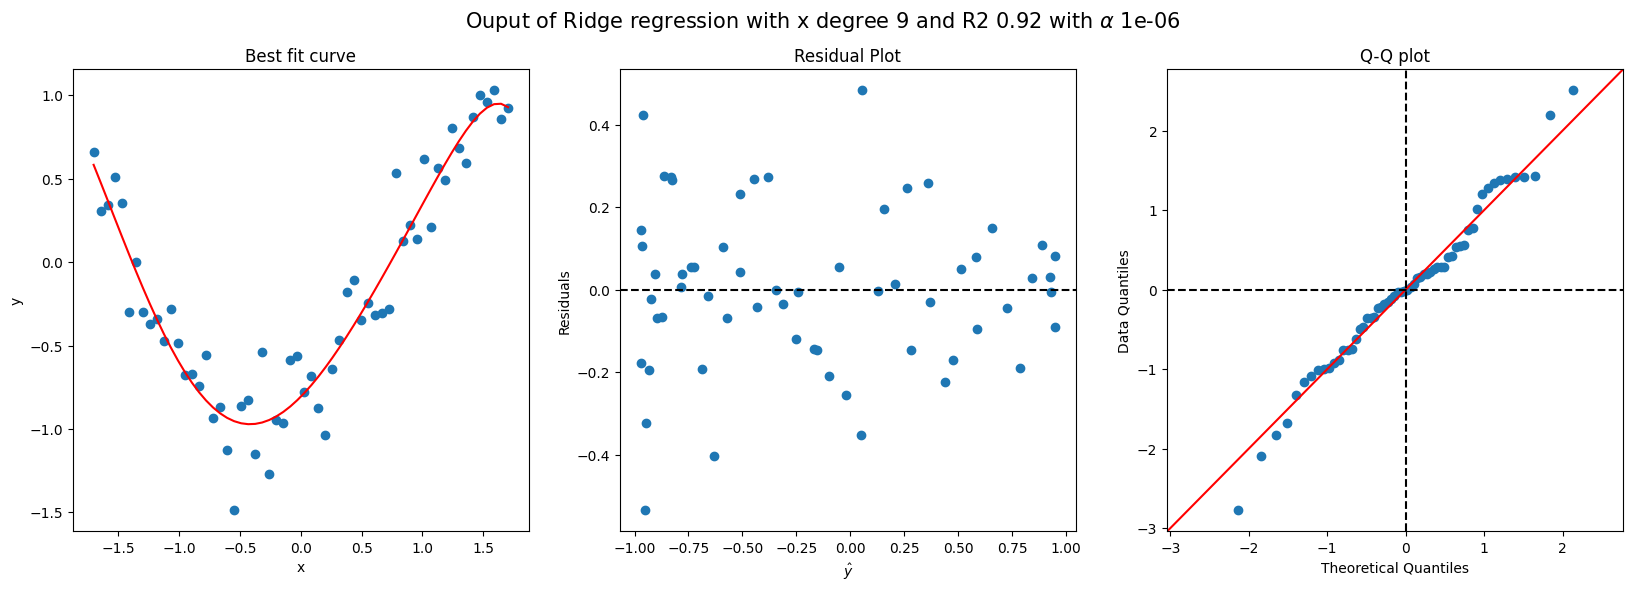

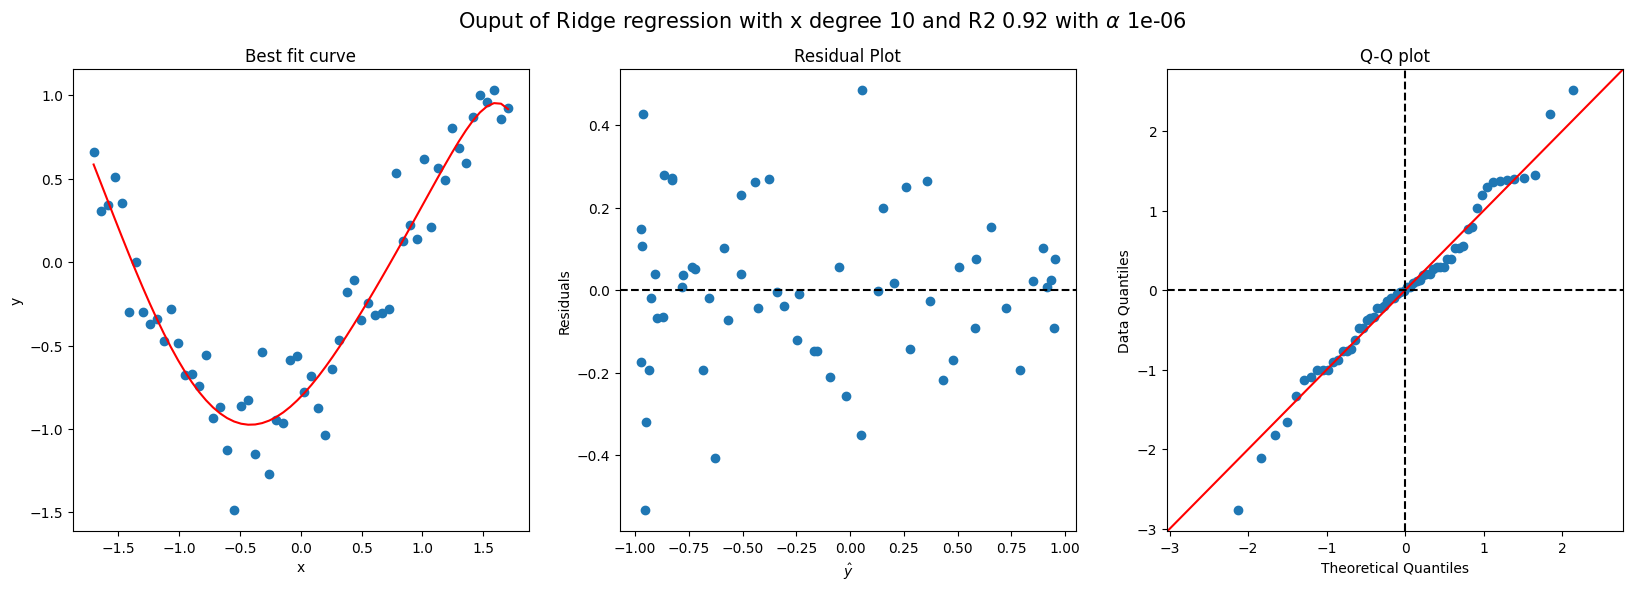

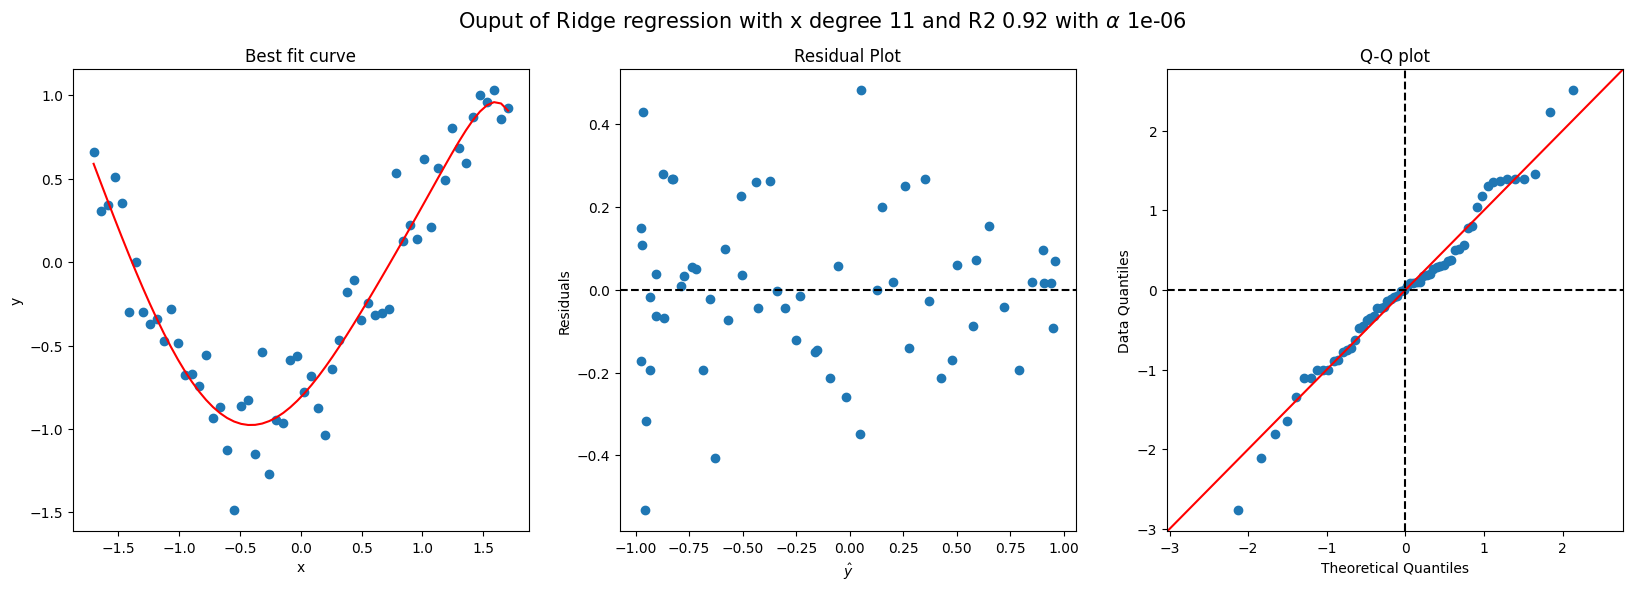

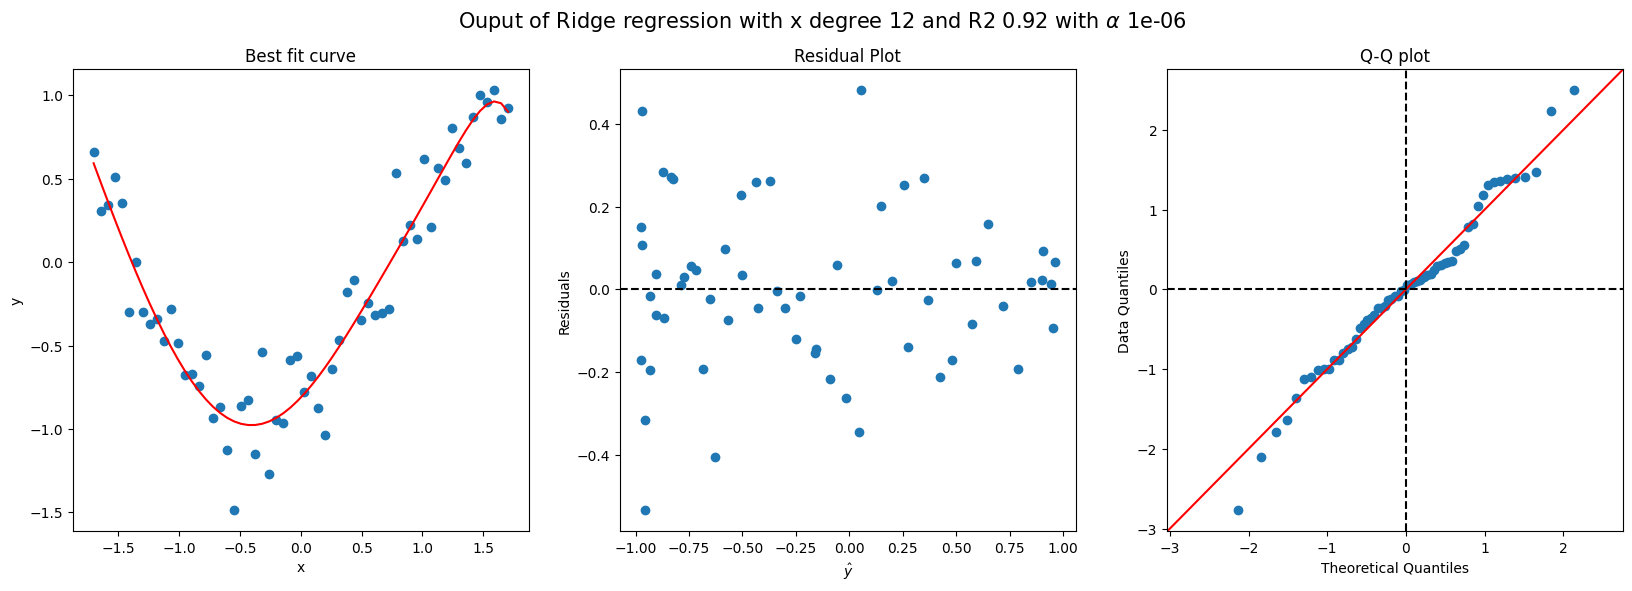

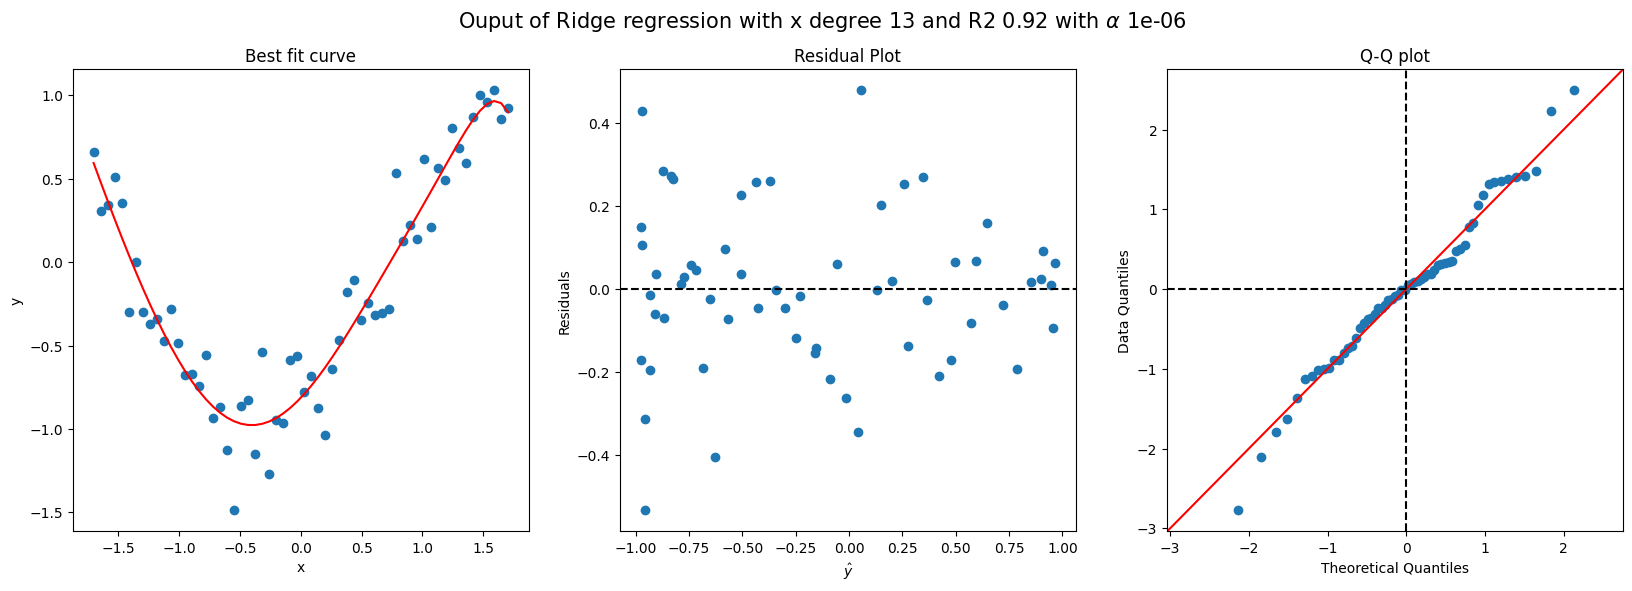

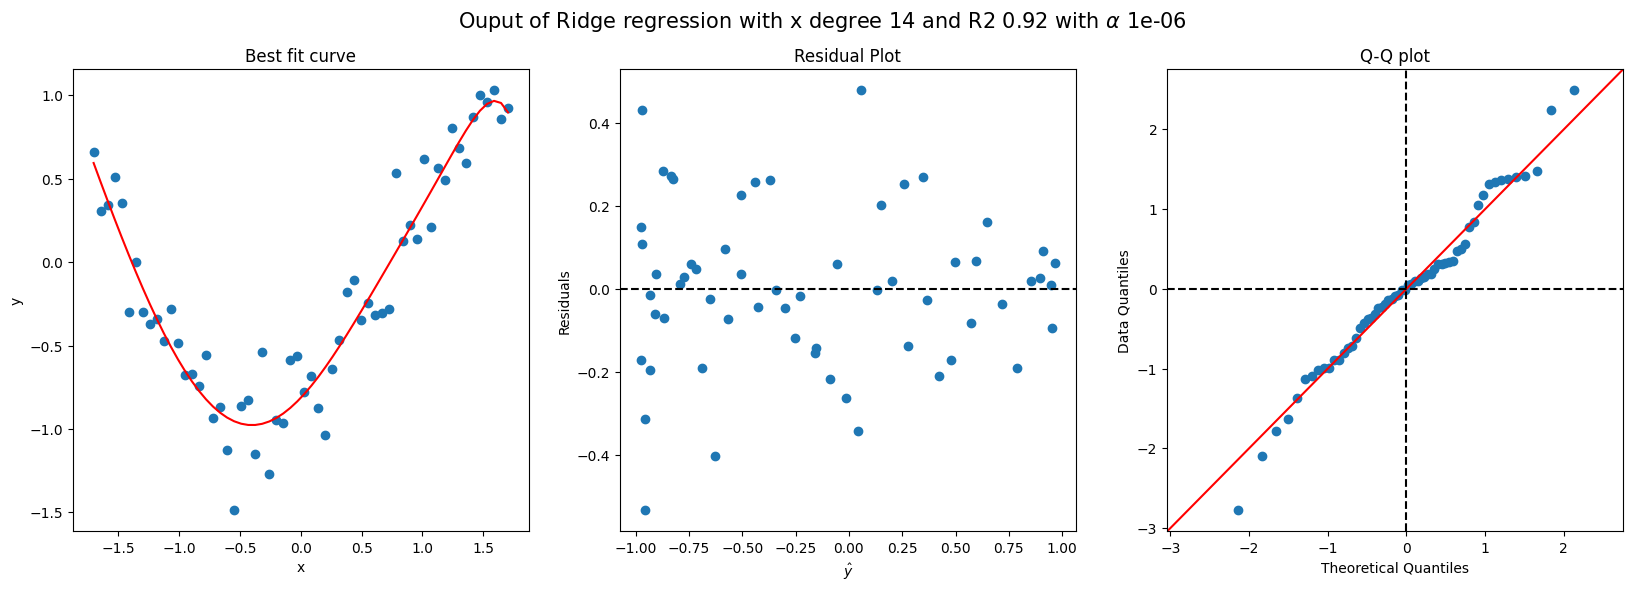

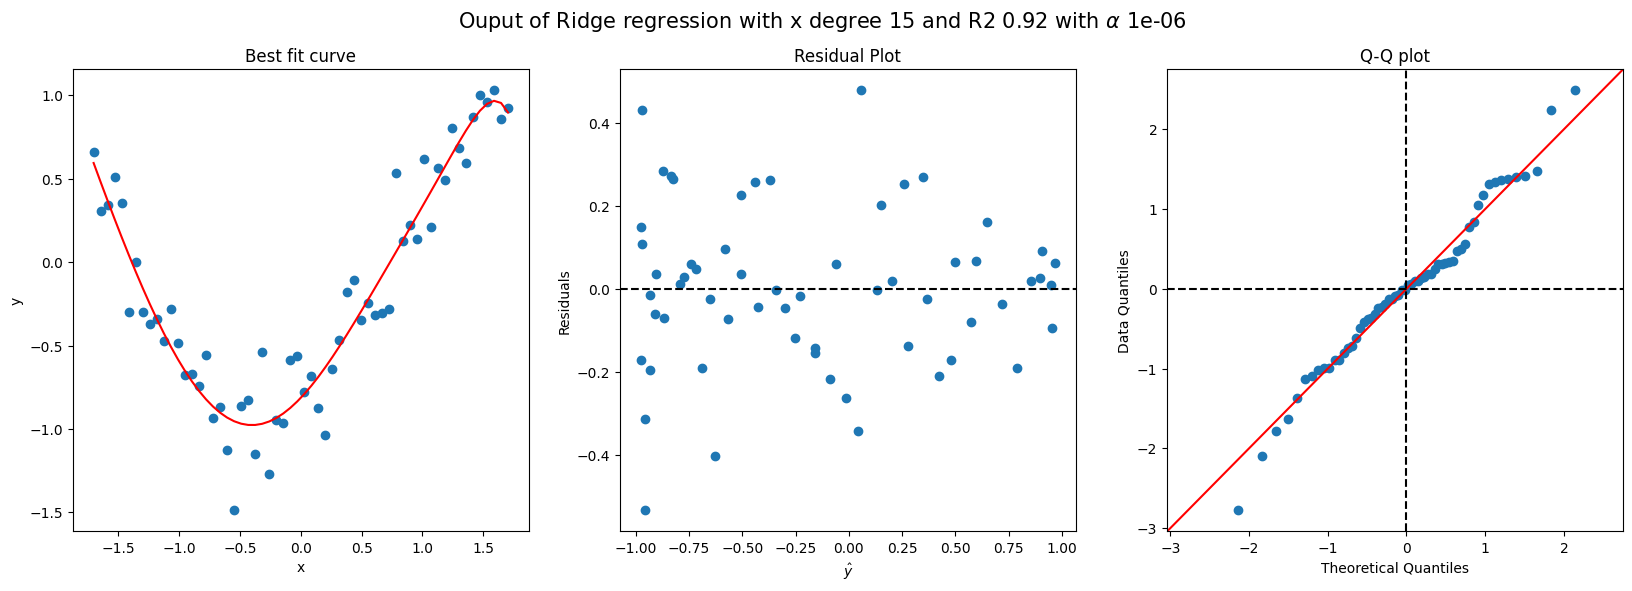

In [ ]:
 Model_fit('Ridge',Ridge(alpha=10**(-6),max_iter=100000),1,16,alpha=1e-6)

##Polyomial Degree of 9-15 are fitted by model properly (With Largest $R^2$ score, further curve doesn't look to be over fitting). So the minimum number is 9 for Ridge regression.

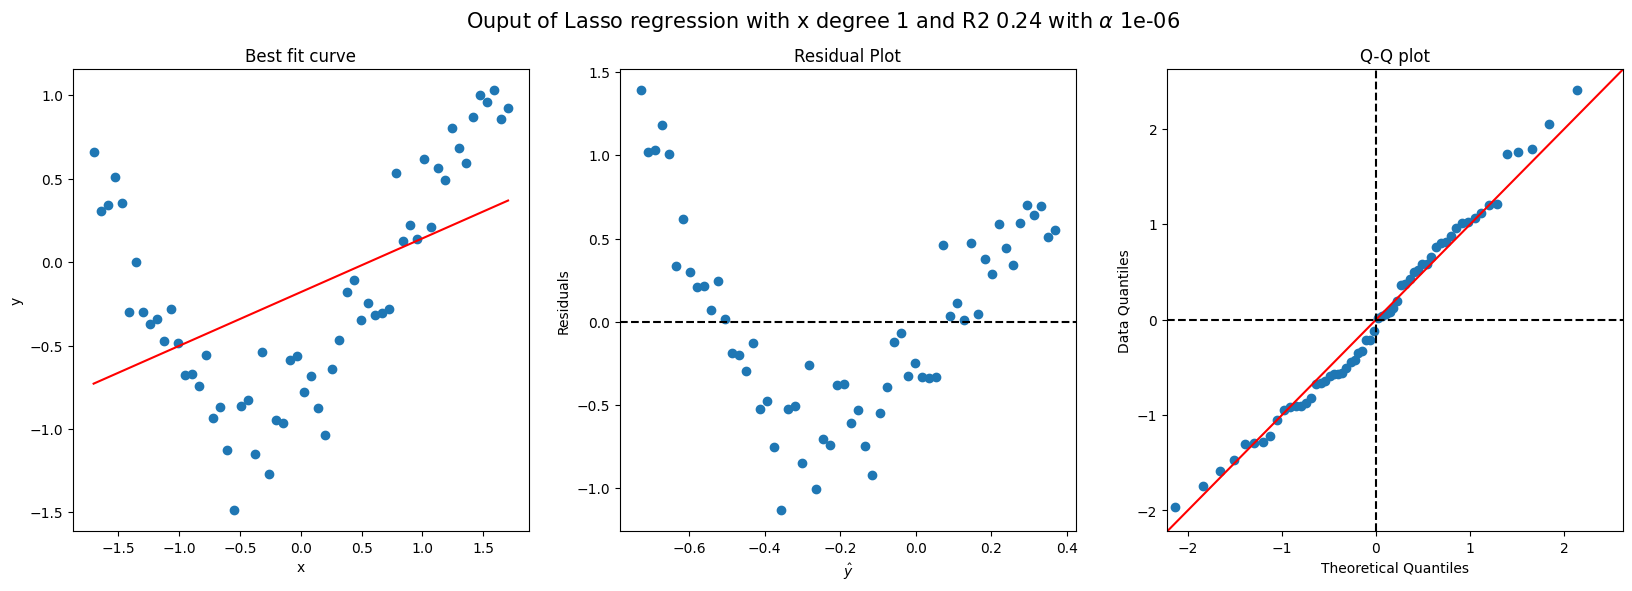

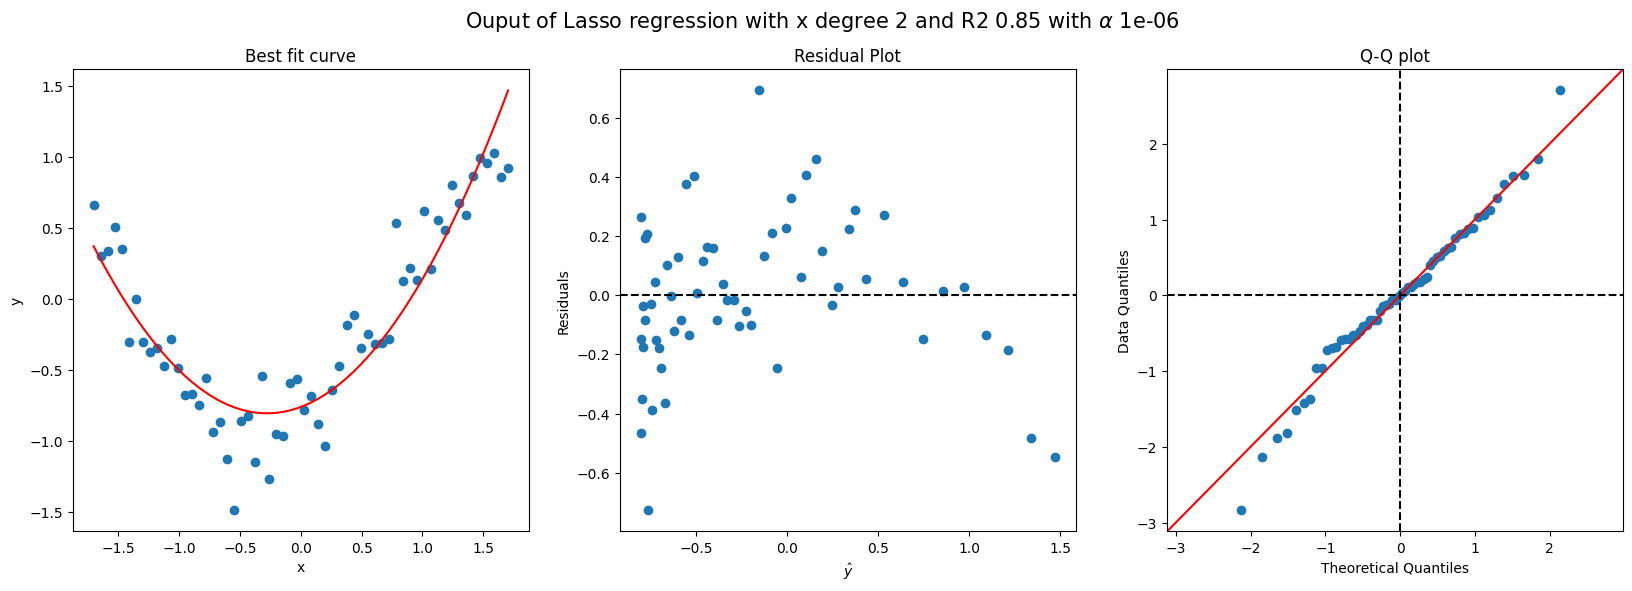

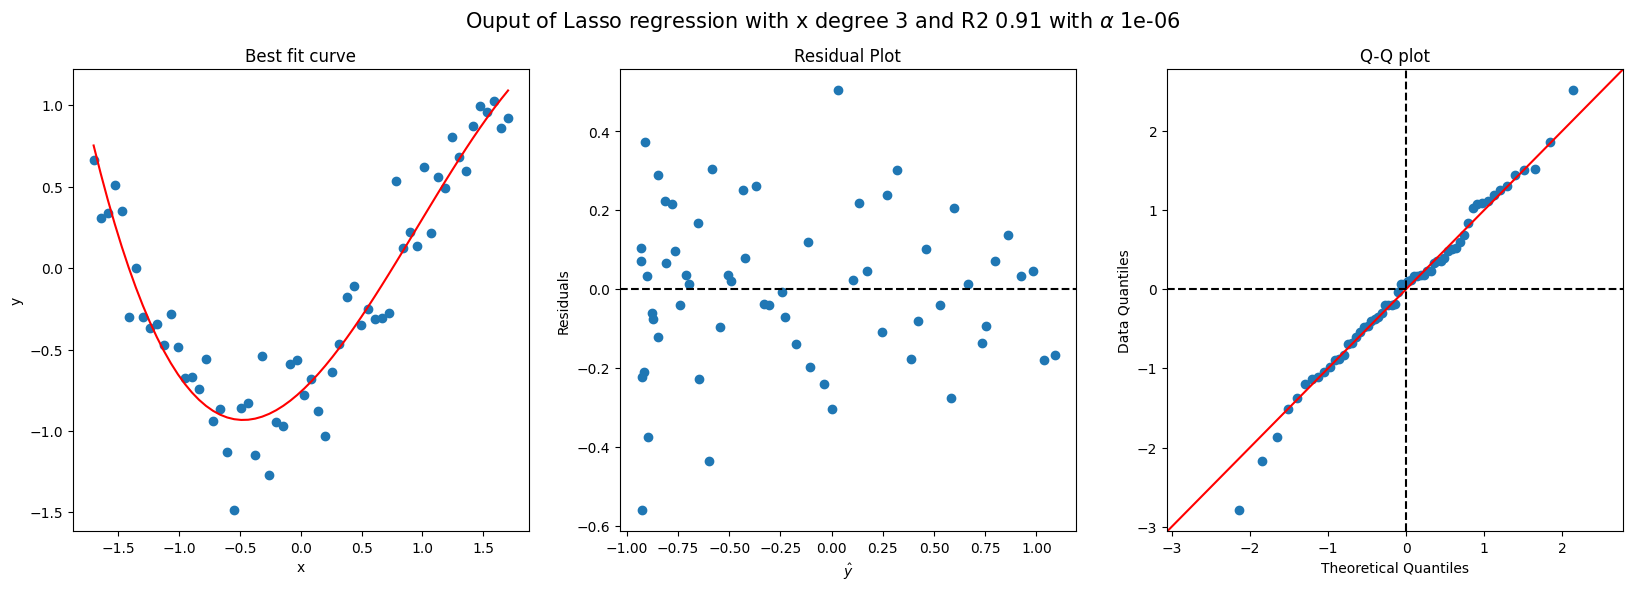

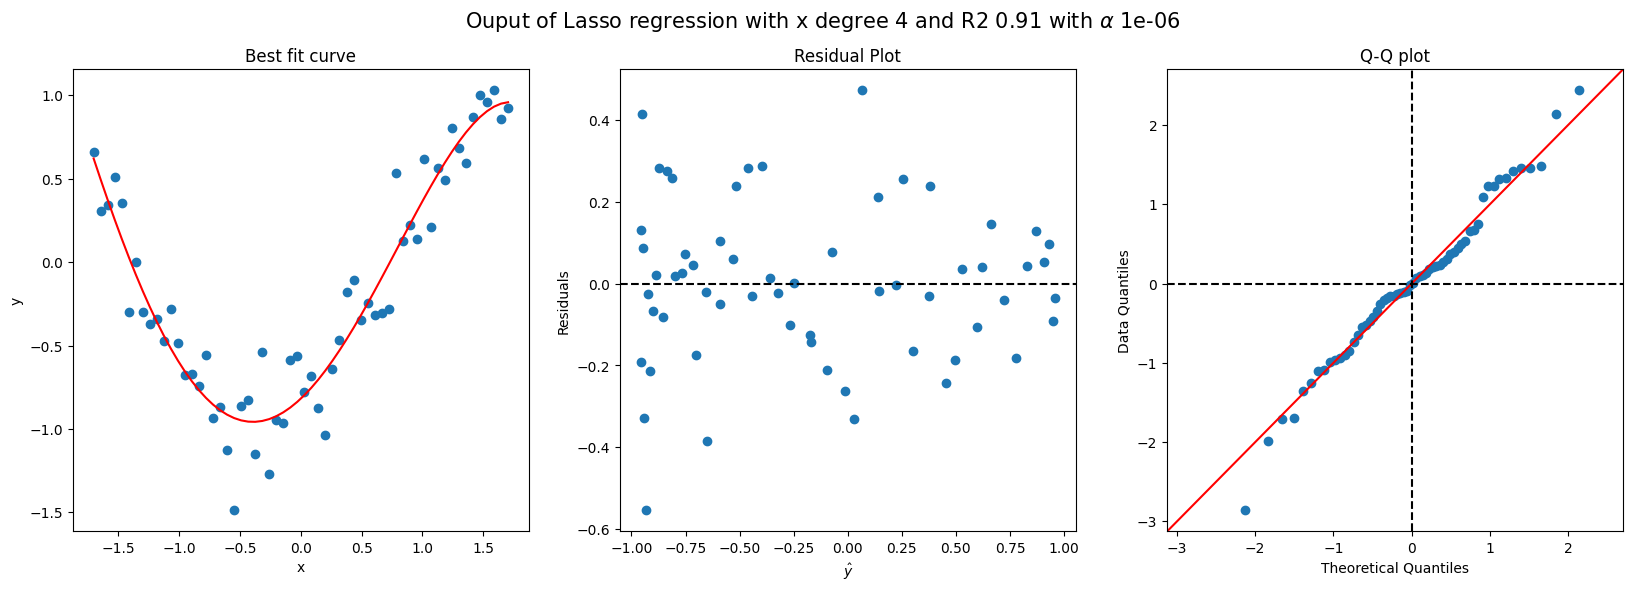

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e-02, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


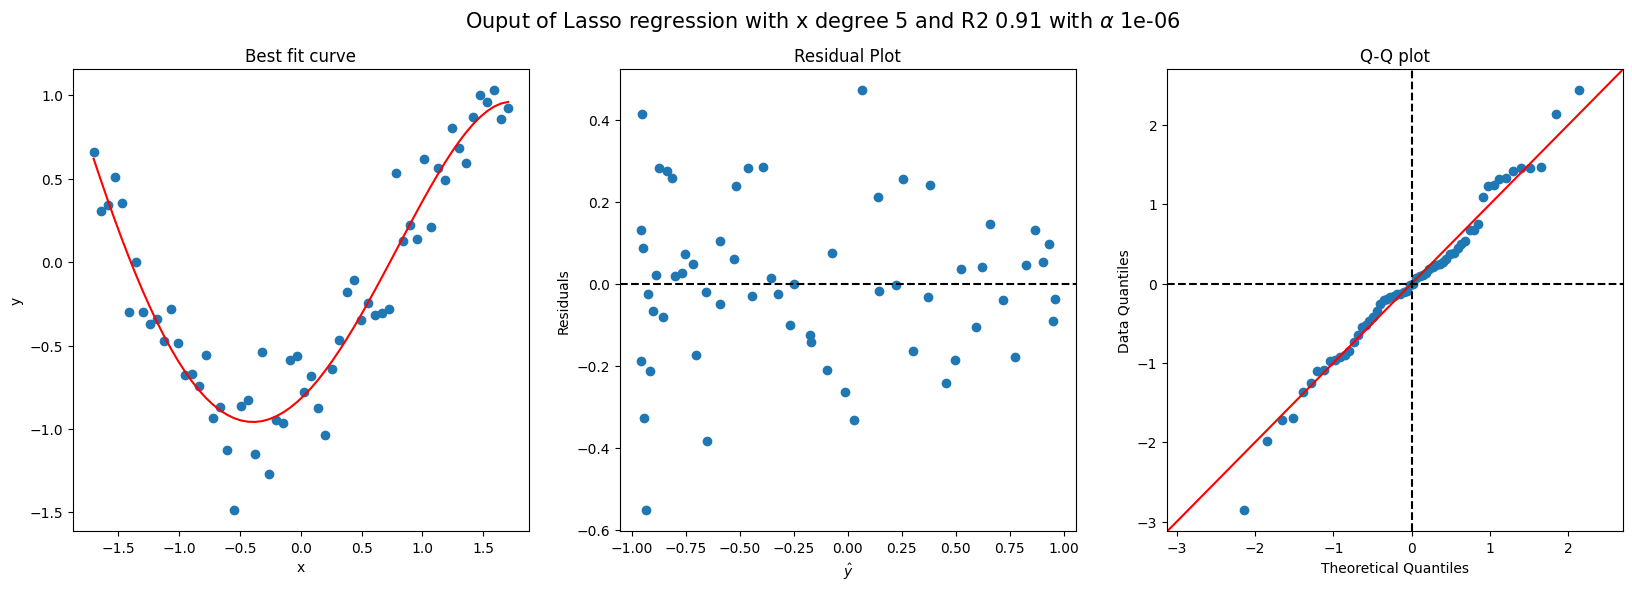

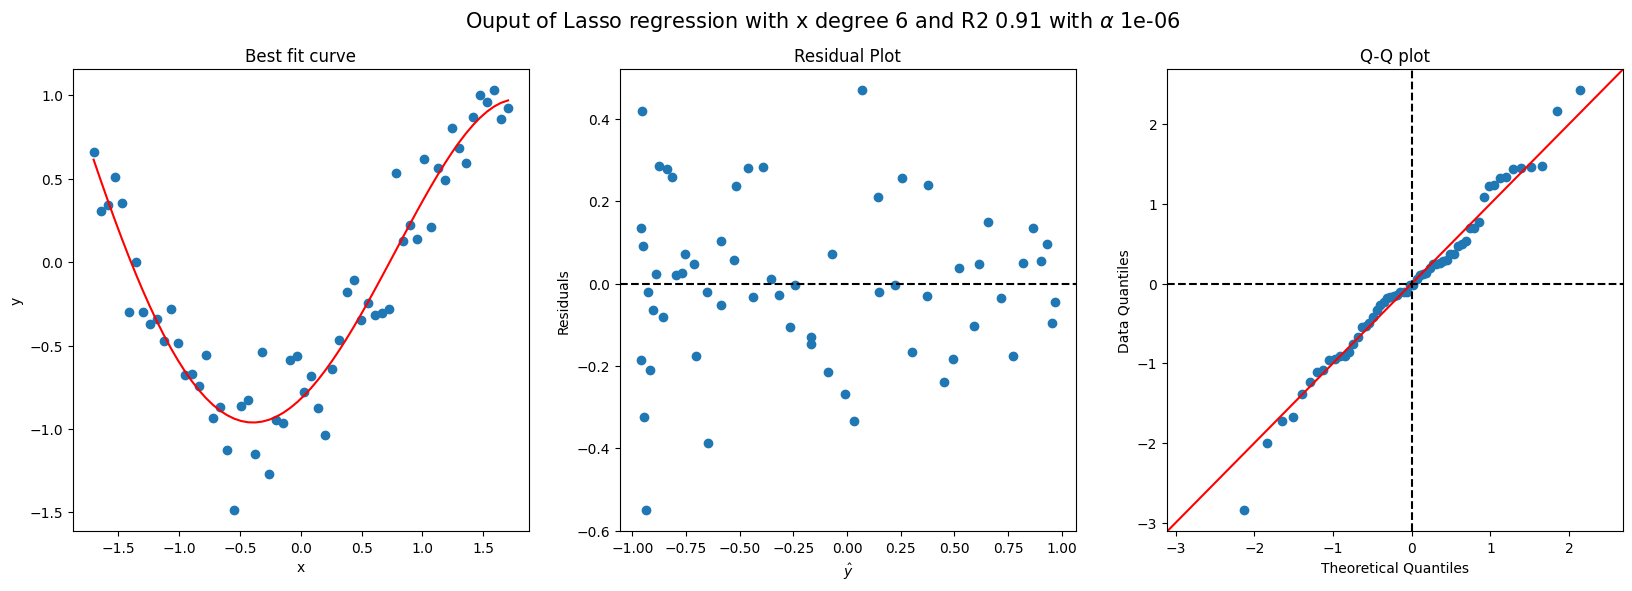

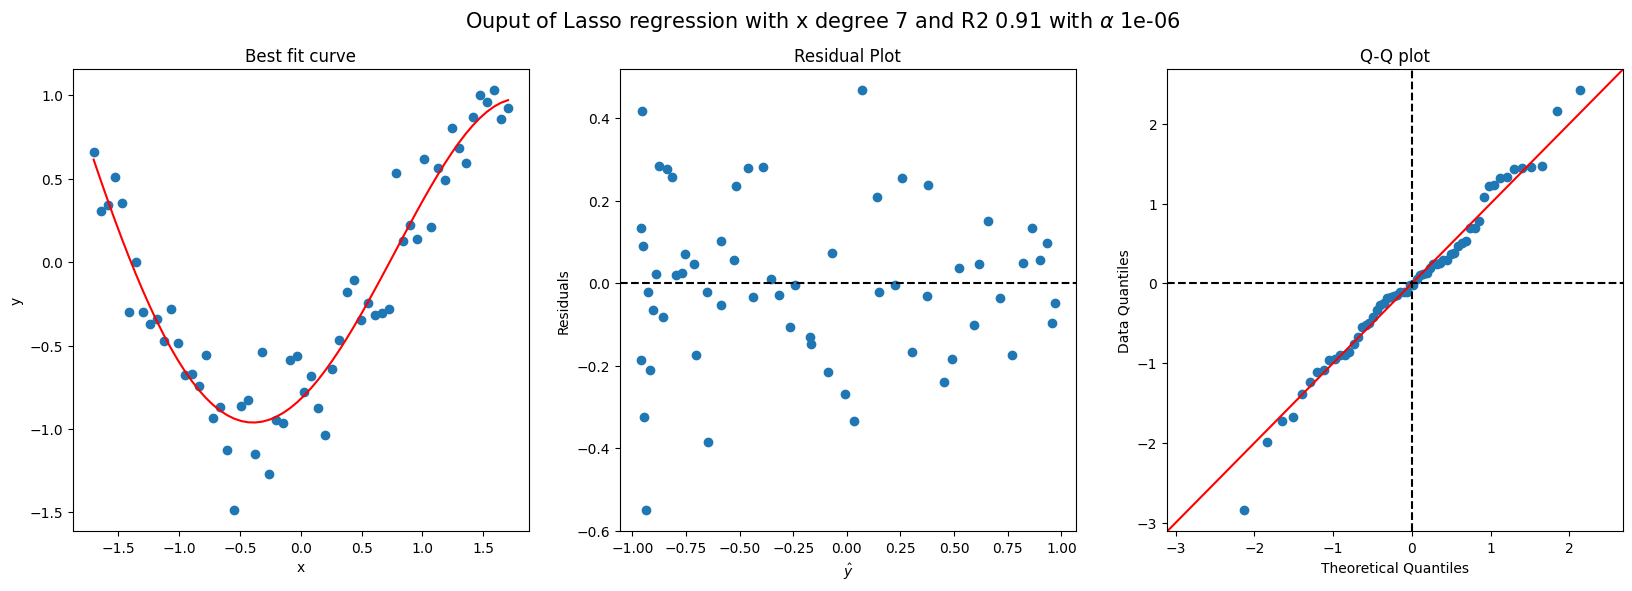

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.326e-02, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


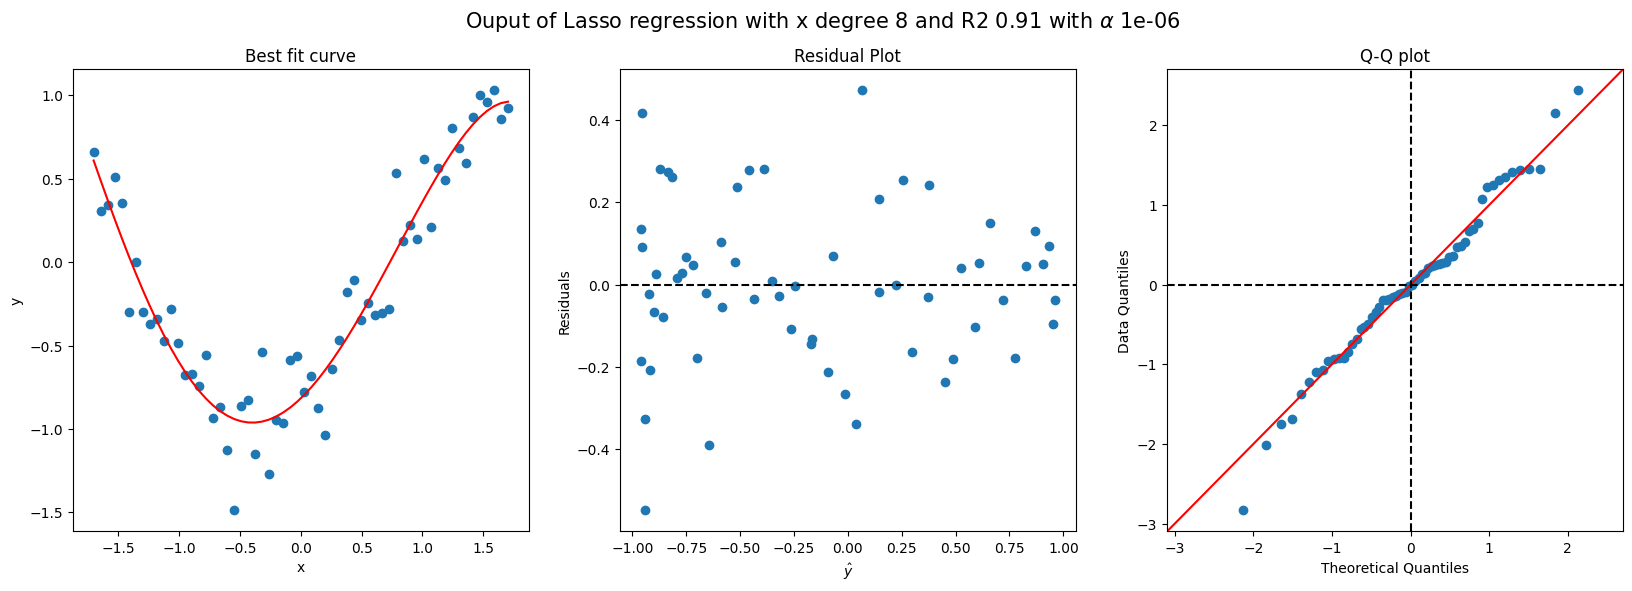

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.634e-02, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


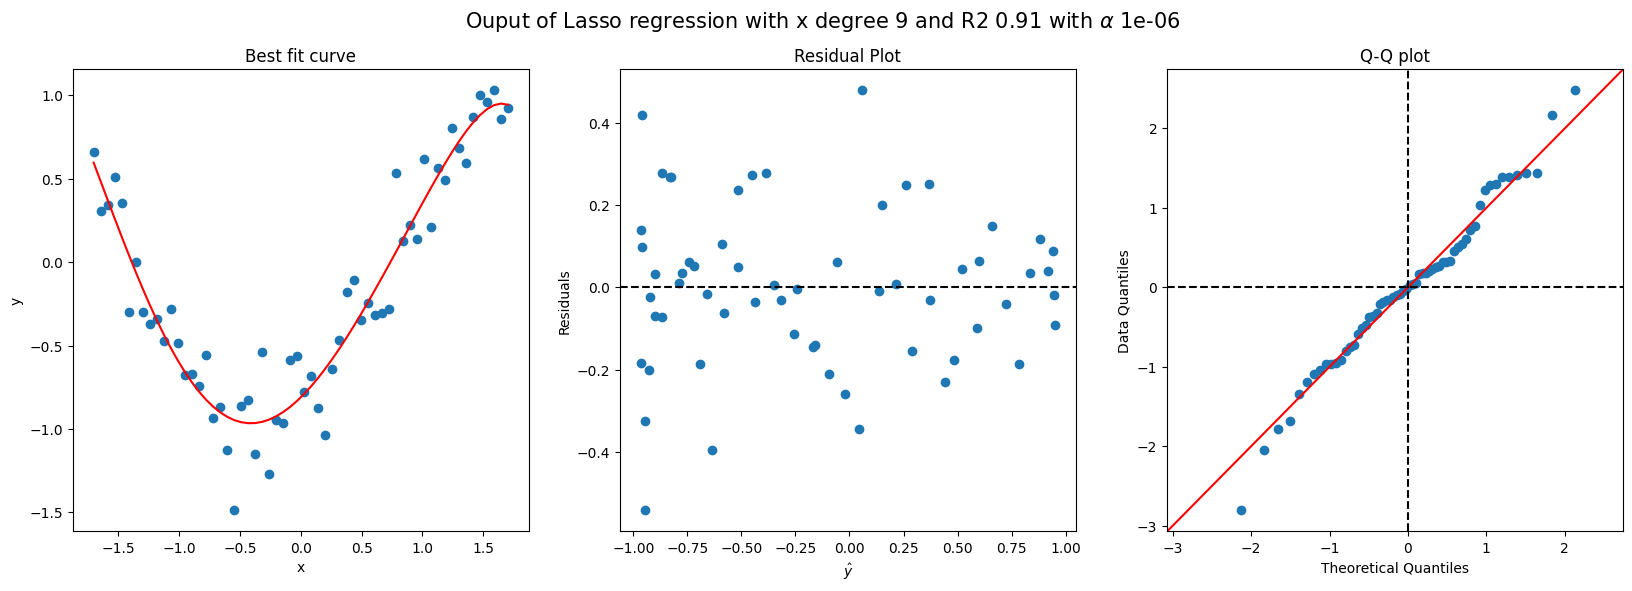

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e-02, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


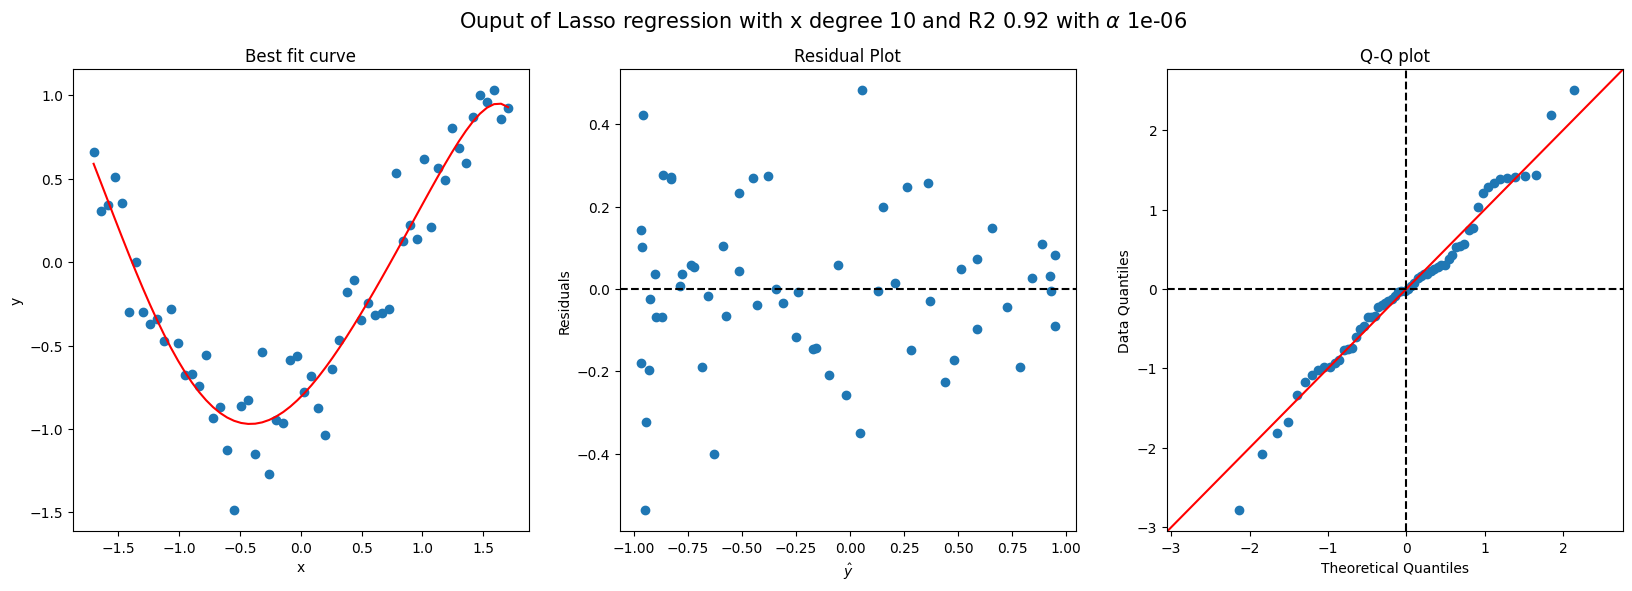

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.990e-03, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


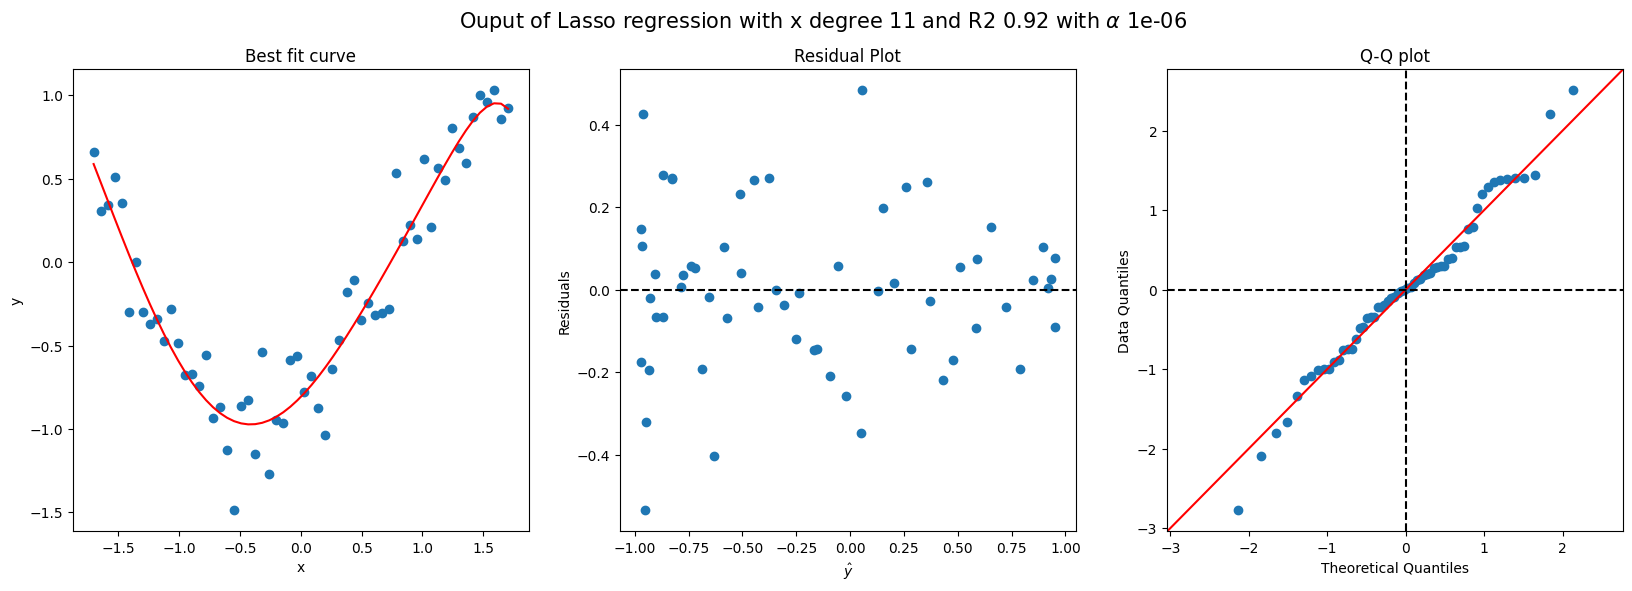

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.019e-02, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


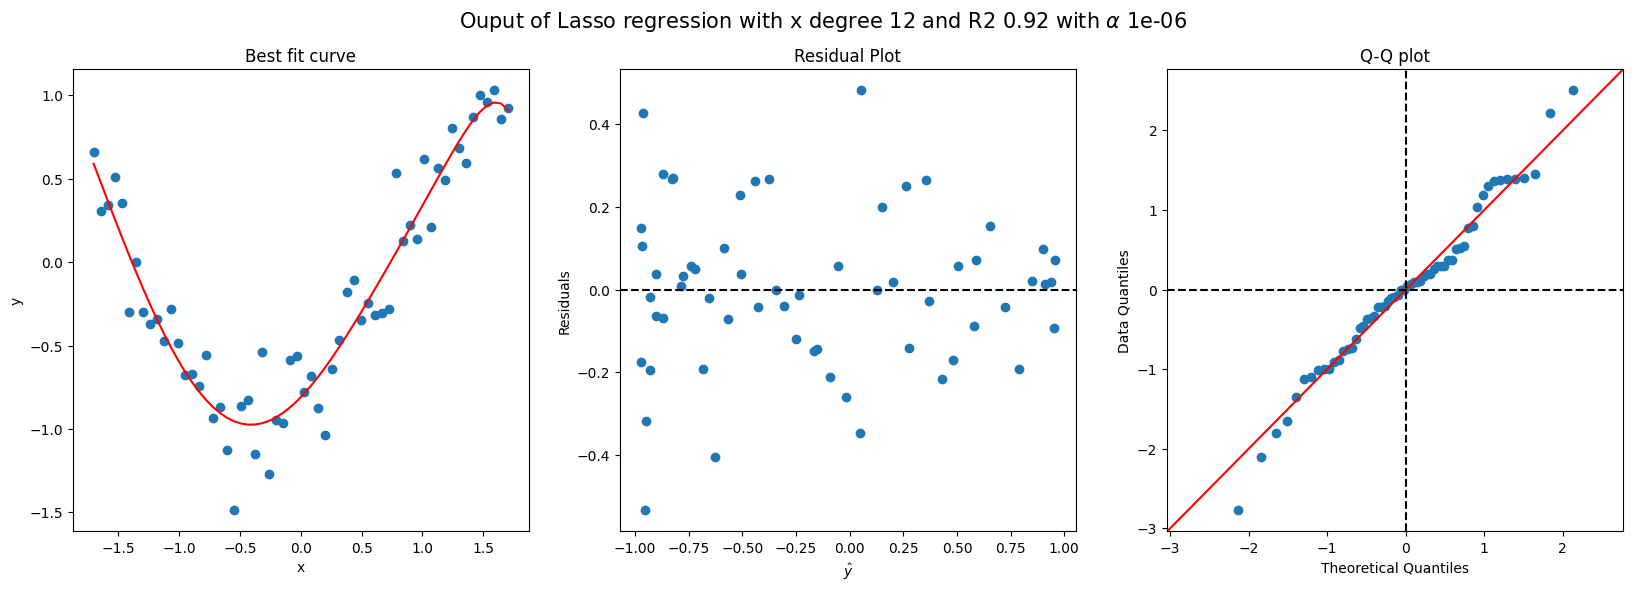

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.001e-02, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


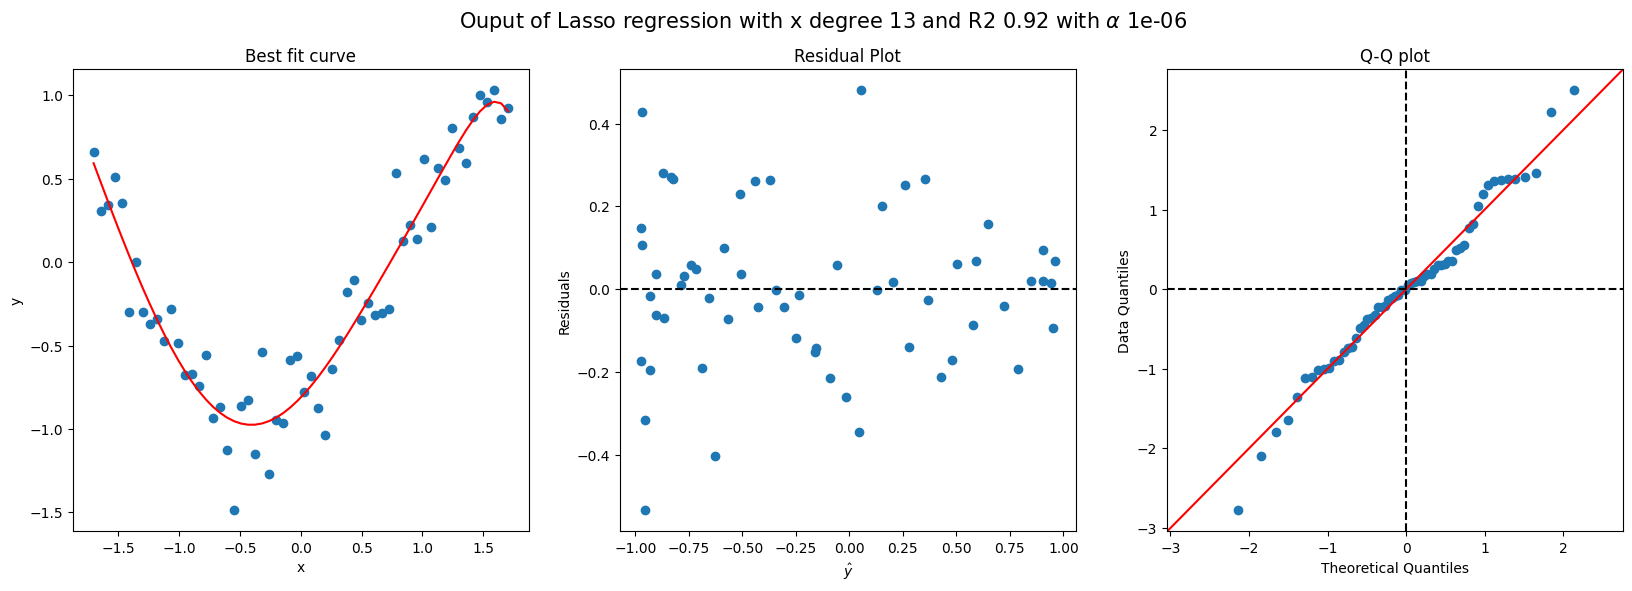

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.224e-03, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


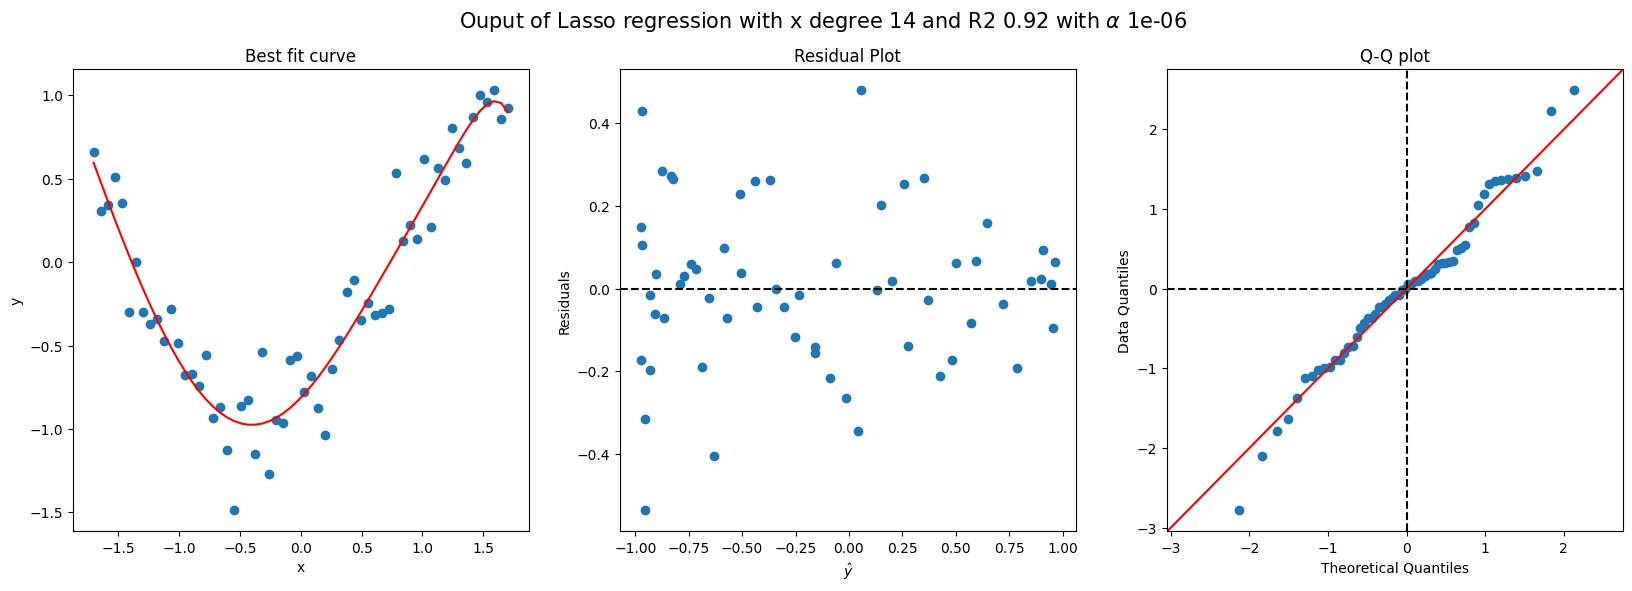

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.960e-03, tolerance: 2.627e-03
  model = cd_fast.enet_coordinate_descent(


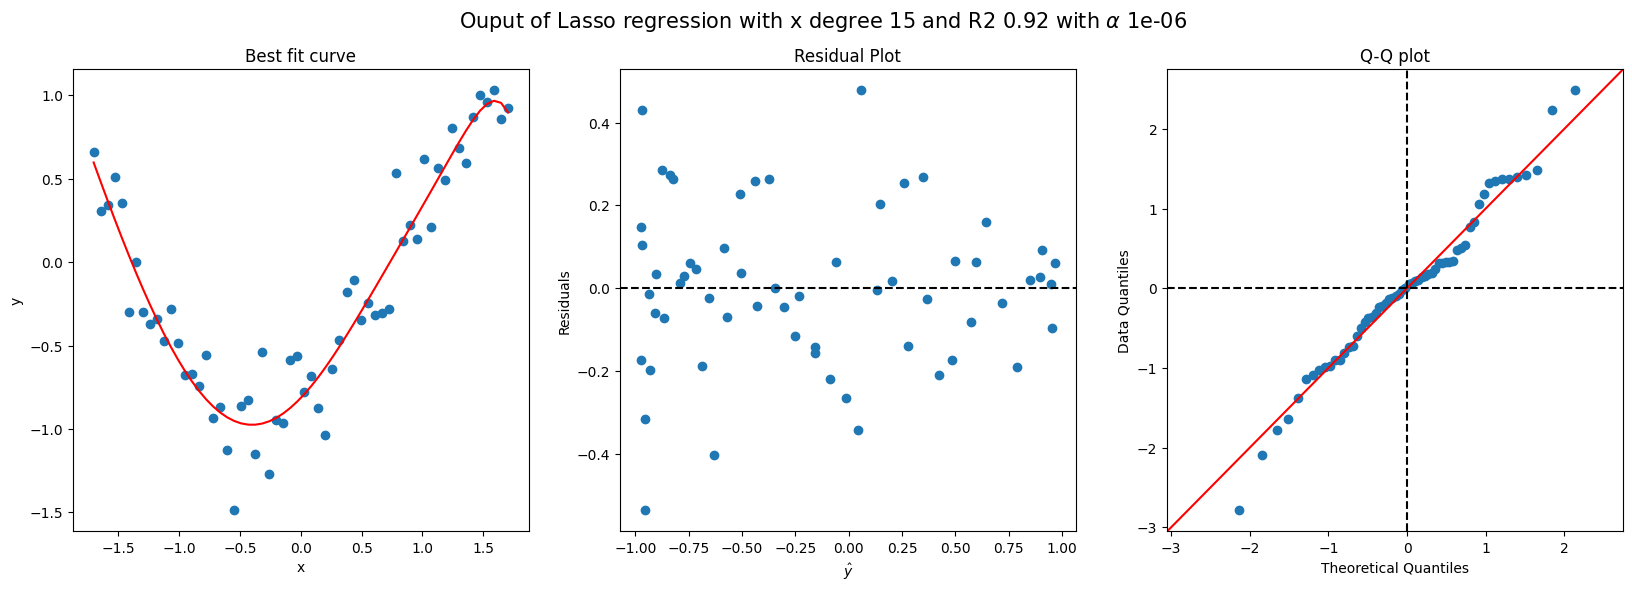

In [ ]:
 Model_fit('Lasso',Lasso(alpha=10**(-6),max_iter=10000000),1,16,alpha=1e-6)

##Polyomial Degree of 3-15 are fitted by model properly. But looking at the plot suggests 9 is better number to go with. So the minimum number is 9 for Lasso regression.